In [1]:
import pandas as pd
import numpy as np

In [2]:
text_data_general = pd.read_csv('data/reviews_text/reviews_general.csv')
print(text_data_general.head(5))
text_data_product = pd.read_csv('data/reviews_text/reviews_product.csv')
print(text_data_product.head(5))
text_data_style = pd.read_csv('data/reviews_text/reviews_style.csv')
print(text_data_style.head(5))

         Type  Rate                                             Review
0  화이트 멜란지/XL     4  178/76 기준으로 L 사이즈는 좀 작아서 XL로 다시 시켰더니 딱 맞습니다. 두...
1      오트밀/XL     5  생각보다 작습니다. 제 스펙이면 무조건 XL 가셔야 하고 팔 길이도 딱 손목시계 차...
2   화이트 멜란지/L     5  색감은 연한 그레이색감인데 화이트가 군데군데 들어가서 좀더 밝은색감이 예쁘네요. 핏...
3       오트밀/M     5  좋은 제품이네요. 여자친구가 잘 샀다고 칭찬해줬어요.일단 옷감도 괜찮고 두툼하니 겨...
4       오트밀/M     5                        자인도 이쁘고 따뜻해서 겨울에 입기 좋을거 같아영
      Type  Rate                                             Review
0    오트밀/L     5                        좋아요 색 이쁘고 무난하게 입기 좋아요 추천합니단
1  퓨어 블랙/L     5  부드러워서 너무 좋았고 무신사 라이브 때 사서 싸게 산거 같아서 굉장히 만족했고 포...
2  퓨어 블랙/M     5                         좋아요 생각했던대로입니다 잘입고 다닐 것 같아요
3   오트밀/XL     1  무신사 최악의 쇼핑몰사이즈 교환하는데 거의 18일 걸림소재는 그냥 저냥 보세 퀄리티...
4    오트밀/M     1  올이 나가고 얼룩이 있는 제품 교환에 2주 이상 걸렸으며, 새로 받은 제품도 마감,...
         Type  Rate                                             Review
0       오트밀/S     5  핏 예술이네요! 갓성비로 입기 좋아요. 도톰해서 안에 히트텍만 입으면 한겨울도 가능...
1  화이트 멜란지/XL     5    기

In [3]:
text_data_style_부정 = pd.read_csv('data/reviews_text/reviews_부정.csv')
print(text_data_style_부정.head(5))

  Type  Rate                                             Review
0   없음     1  이너로 입기 좋습니다 하지만 목카라가 두껍고 늘어지지 않는 재질이라 작년 구매이후 ...
1   없음     1                      최악인듯 합니다 등이 너무 따가워요 다신 구매안합니다
2   없음     1             목이 너무 헐렁해서 좀 그렇습니다 이제 릴렉스핏 라인은 안살것 같네요
3   없음     1                                  제품 자체는 가격대비 괜찮네요.
4   없음     1        화이트 블랙 두색상 시켰는데 동일한 제품임에도 입었을 때 사이즈 차이가 큽니다


## EDA

In [4]:
text_review_data = pd.concat([text_data_general, text_data_product, text_data_style, text_data_style_부정], axis=0, ignore_index = True)
text_review_data

Type  Rate                                             Review
0      화이트 멜란지/XL     4  178/76 기준으로 L 사이즈는 좀 작아서 XL로 다시 시켰더니 딱 맞습니다. 두...
1          오트밀/XL     5  생각보다 작습니다. 제 스펙이면 무조건 XL 가셔야 하고 팔 길이도 딱 손목시계 차...
2       화이트 멜란지/L     5  색감은 연한 그레이색감인데 화이트가 군데군데 들어가서 좀더 밝은색감이 예쁘네요. 핏...
3           오트밀/M     5  좋은 제품이네요. 여자친구가 잘 샀다고 칭찬해줬어요.일단 옷감도 괜찮고 두툼하니 겨...
4           오트밀/M     5                        자인도 이쁘고 따뜻해서 겨울에 입기 좋을거 같아영
...           ...   ...                                                ...
17839          없음     3                         가격대비 비싼거 같아요 보세랑 다를게 없네요 흑
17840          없음     3                  제가 비율이 안 좋아서 그런가 저는 다리가 짧아 보이더라고요
17841          없음     3         카키색이랑 같이 시켰는데 검정색은 누가 입은거처럼 주름이 많이 잡혀서 왔어요
17842          없음     3                      교환 귀찮아서 그냥 입어요 다음부터 검수 잘 해주세요
17843          없음     3                          사이즈 넉넉하고 좋아요 활용도가 높아서 좋아요

[17844 rows x 3 columns]

In [5]:
len(text_review_data['Review'].unique())

12496

In [6]:
text_review_data = text_review_data.drop_duplicates(subset = 'Review', keep = 'first', ignore_index = True)
text_review_data

Type  Rate                                             Review
0      화이트 멜란지/XL     4  178/76 기준으로 L 사이즈는 좀 작아서 XL로 다시 시켰더니 딱 맞습니다. 두...
1          오트밀/XL     5  생각보다 작습니다. 제 스펙이면 무조건 XL 가셔야 하고 팔 길이도 딱 손목시계 차...
2       화이트 멜란지/L     5  색감은 연한 그레이색감인데 화이트가 군데군데 들어가서 좀더 밝은색감이 예쁘네요. 핏...
3           오트밀/M     5  좋은 제품이네요. 여자친구가 잘 샀다고 칭찬해줬어요.일단 옷감도 괜찮고 두툼하니 겨...
4           오트밀/M     5                        자인도 이쁘고 따뜻해서 겨울에 입기 좋을거 같아영
...           ...   ...                                                ...
12491          없음     3                         가격대비 비싼거 같아요 보세랑 다를게 없네요 흑
12492          없음     3                  제가 비율이 안 좋아서 그런가 저는 다리가 짧아 보이더라고요
12493          없음     3         카키색이랑 같이 시켰는데 검정색은 누가 입은거처럼 주름이 많이 잡혀서 왔어요
12494          없음     3                      교환 귀찮아서 그냥 입어요 다음부터 검수 잘 해주세요
12495          없음     3                          사이즈 넉넉하고 좋아요 활용도가 높아서 좋아요

[12496 rows x 3 columns]

* 중복 제거 한 총 활용 데이터 개수: 11992개
* 부정 리뷰 추가 -> 12508개

## Review 부분 전처리

In [7]:
Review = text_review_data['Review']
Review

0        178/76 기준으로 L 사이즈는 좀 작아서 XL로 다시 시켰더니 딱 맞습니다. 두...
1        생각보다 작습니다. 제 스펙이면 무조건 XL 가셔야 하고 팔 길이도 딱 손목시계 차...
2        색감은 연한 그레이색감인데 화이트가 군데군데 들어가서 좀더 밝은색감이 예쁘네요. 핏...
3        좋은 제품이네요. 여자친구가 잘 샀다고 칭찬해줬어요.일단 옷감도 괜찮고 두툼하니 겨...
4                              자인도 이쁘고 따뜻해서 겨울에 입기 좋을거 같아영
                               ...                        
12491                           가격대비 비싼거 같아요 보세랑 다를게 없네요 흑
12492                    제가 비율이 안 좋아서 그런가 저는 다리가 짧아 보이더라고요
12493           카키색이랑 같이 시켰는데 검정색은 누가 입은거처럼 주름이 많이 잡혀서 왔어요
12494                        교환 귀찮아서 그냥 입어요 다음부터 검수 잘 해주세요
12495                            사이즈 넉넉하고 좋아요 활용도가 높아서 좋아요
Name: Review, Length: 12496, dtype: object

In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from konlpy.tag import Okt
from collections import Counter

In [9]:
import re

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [10]:
text_review_data['Review'][0]

'178/76 기준으로 L 사이즈는 좀 작아서 XL로 다시 시켰더니 딱 맞습니다. 두께는 두껍지도 않고 얇지도 않은 정도입니다.'

In [11]:
apply_regular_expression(text_review_data['Review'][0])

' 기준으로  사이즈는 좀 작아서 로 다시 시켰더니 딱 맞습니다 두께는 두껍지도 않고 얇지도 않은 정도입니다'

In [12]:
okt = Okt()  # 명사 형태소 추출 함수
nouns = okt.nouns(apply_regular_expression(text_review_data['Review'][0]))
nouns

['기준', '사이즈', '좀', '로', '다시', '두께', '정도']

In [13]:
# 말뭉치 생성
corpus = "".join(text_review_data['Review'].tolist())
corpus

"178/76 기준으로 L 사이즈는 좀 작아서 XL로 다시 시켰더니 딱 맞습니다. 두께는 두껍지도 않고 얇지도 않은 정도입니다.생각보다 작습니다. 제 스펙이면 무조건 XL 가셔야 하고 팔 길이도 딱 손목시계 차는 곳 까지 옵니다. 그럼에도 불구하고 핏이 예술이라 좋네요. 2XL도 있었으면 좋겠지만 그래도 만족합니다.색감은 연한 그레이색감인데 화이트가 군데군데 들어가서 좀더 밝은색감이 예쁘네요. 핏감은 세미오버한 핏감으로 입기 좋았고 면60 아크릴 40이라 보풀이 일어나긴 하겠지만 면이 혼방되어있어서 조금이나마 관리하기 괜찮을거 같아요. 두께감은 두껍진 않고 살짝 얇은쪽에 가까운거 같아요. 하지만 너무 얇지도 않아서 만족합니다. 전체적인 디자인은 어떤 룩에도 잘 어울릴만한 디자인이라 추천드려요.좋은 제품이네요. 여자친구가 잘 샀다고 칭찬해줬어요.일단 옷감도 괜찮고 두툼하니 겨울에도 잘입을수있을거같아요.단품으로 입어도 스타일 자체가 잘 나와서 좋네요.자인도 이쁘고 따뜻해서 겨울에 입기 좋을거 같아영요새 어떤 옷을 입어야할지 고민했는데 색감도 이쁘고 무엇보다 카라부분과 재질이 마음에 드네요 ㅎㅎ 사이즈도 정사이즈네요날씨 추워지기 전에 미리 옷 장만할 겸 세일할 때 샀는데 이정도 가격에 이 퀄리티면 좋은 것 같습니다 디자인은 제일 기본적인 반집업 니트같아요 그리고저는 맨살에 입어도 까슬까슬한거 잘 못느꼈어요퀄리티 좋습니다!키뮤어 하프집업 세일할 구매했는데 가성비 좋아요배송이 엄청 빨리 왔네요하프집업 니트 하나 사고 싶었는데이번에 좋은 가격으로 구매할 수 있었어요가성비로 최고입니다.워셔블이라서 세탁기에 막 돌려도 되고원단도 부드럽고 탄탄하이 좋습니다.아이보리색도 원래있었는데 블랙도 정말 이뻐요색감이나 재질이랑 전체적으로 확실히 가성비 좋긴한데 핏이 살짝 애매한 것 같고구매하고 나니까 더 싸지고 하는게 썩 기분 좋진 않네요완전 만족하고 두께도 적당 하네요재구매 했어요무난하고 예뻐서 손이 자주 가고 어떤 옷과도 잘 어울려 만족합니다.색을 잘못 골랐다..화이트 멜란지할껄..

In [14]:
apply_regular_expression(corpus)

' 기준으로  사이즈는 좀 작아서 로 다시 시켰더니 딱 맞습니다 두께는 두껍지도 않고 얇지도 않은 정도입니다생각보다 작습니다 제 스펙이면 무조건  가셔야 하고 팔 길이도 딱 손목시계 차는 곳 까지 옵니다 그럼에도 불구하고 핏이 예술이라 좋네요 도 있었으면 좋겠지만 그래도 만족합니다색감은 연한 그레이색감인데 화이트가 군데군데 들어가서 좀더 밝은색감이 예쁘네요 핏감은 세미오버한 핏감으로 입기 좋았고 면 아크릴 이라 보풀이 일어나긴 하겠지만 면이 혼방되어있어서 조금이나마 관리하기 괜찮을거 같아요 두께감은 두껍진 않고 살짝 얇은쪽에 가까운거 같아요 하지만 너무 얇지도 않아서 만족합니다 전체적인 디자인은 어떤 룩에도 잘 어울릴만한 디자인이라 추천드려요좋은 제품이네요 여자친구가 잘 샀다고 칭찬해줬어요일단 옷감도 괜찮고 두툼하니 겨울에도 잘입을수있을거같아요단품으로 입어도 스타일 자체가 잘 나와서 좋네요자인도 이쁘고 따뜻해서 겨울에 입기 좋을거 같아영요새 어떤 옷을 입어야할지 고민했는데 색감도 이쁘고 무엇보다 카라부분과 재질이 마음에 드네요 ㅎㅎ 사이즈도 정사이즈네요날씨 추워지기 전에 미리 옷 장만할 겸 세일할 때 샀는데 이정도 가격에 이 퀄리티면 좋은 것 같습니다 디자인은 제일 기본적인 반집업 니트같아요 그리고저는 맨살에 입어도 까슬까슬한거 잘 못느꼈어요퀄리티 좋습니다키뮤어 하프집업 세일할 구매했는데 가성비 좋아요배송이 엄청 빨리 왔네요하프집업 니트 하나 사고 싶었는데이번에 좋은 가격으로 구매할 수 있었어요가성비로 최고입니다워셔블이라서 세탁기에 막 돌려도 되고원단도 부드럽고 탄탄하이 좋습니다아이보리색도 원래있었는데 블랙도 정말 이뻐요색감이나 재질이랑 전체적으로 확실히 가성비 좋긴한데 핏이 살짝 애매한 것 같고구매하고 나니까 더 싸지고 하는게 썩 기분 좋진 않네요완전 만족하고 두께도 적당 하네요재구매 했어요무난하고 예뻐서 손이 자주 가고 어떤 옷과도 잘 어울려 만족합니다색을 잘못 골랐다화이트 멜란지할껄오트밀 컬러는 살짝 그렇습니다평소에 입고 나가기에 너무 좋은 옷인거 같아요

In [15]:
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

['기준', '사이즈', '좀', '로', '다시', '두께', '정도', '생각', '제', '스펙', '이면', '무조건', '팔', '길이', '손목시계', '곳', '불구', '핏', '예술', '도', '색감', '연한', '그레이', '색감', '화이트', '군데군데', '좀더', '색감', '핏감', '세미', '오버', '핏감', '면', '아크릴', '보풀', '면', '혼방', '조금', '관리', '두께', '살짝', '쪽', '전체', '디자인', '룩', '디자인', '추천', '제품', '요', '여자친구', '칭찬', '일단', '옷감', '툼', '겨울', '단품', '스타일', '자체', '자인', '겨울', '요새', '옷', '고민', '색감', '무엇', '카라', '부분', '재질', '마음', '드네', '사이즈', '정사', '이즈', '날씨', '전', '미리', '옷', '장만', '겸', '일', '때', '이정', '가격', '이', '퀄리티', '것', '디자인', '제일', '기본', '집업', '니트', '고저', '살', '까슬까슬', '거', '퀄리티', '키뮤', '하프', '집업', '일', '구매', '가성', '비', '배송', '하프', '집업', '니트', '하나', '사고', '이번', '가격', '구매', '수', '요가', '성비', '최고', '셔블', '세탁기', '막', '원단', '아이보리', '색도', '원래', '블랙', '정말', '색감', '재질', '전체', '가성', '비', '핏', '살짝', '것', '구매', '나', '더', '썩', '기분', '완전', '두께', '적당', '무난', '손', '자주', '옷', '색', '잘못', '화이트', '멜란지', '할껄', '오트밀', '컬러', '살짝', '평소', '옷', '고민', '분', '꼭', '한번', '곧', '봄', '자주', '옷', '전체', '습', '색', '겨울', '또', '아이어', '에나

In [16]:
# 빈도 탐색
counter = Counter(nouns)
counter.most_common(1000)

[('사이즈', 1970),
 ('옷', 1686),
 ('핏', 1554),
 ('생각', 1387),
 ('니트', 1187),
 ('것', 1136),
 ('가격', 1057),
 ('색감', 1016),
 ('구매', 999),
 ('집업', 853),
 ('재질', 804),
 ('거', 778),
 ('가성', 724),
 ('색상', 723),
 ('좀', 722),
 ('무난', 700),
 ('비', 682),
 ('느낌', 605),
 ('추천', 603),
 ('맘', 596),
 ('더', 584),
 ('때', 575),
 ('입', 572),
 ('마음', 557),
 ('두께', 539),
 ('조금', 537),
 ('하프', 531),
 ('겨울', 530),
 ('버핏', 513),
 ('자주', 491),
 ('배송', 446),
 ('디자인', 429),
 ('아주', 409),
 ('안', 409),
 ('색', 402),
 ('수', 399),
 ('정말', 386),
 ('살짝', 367),
 ('대비', 363),
 ('부분', 360),
 ('제품', 359),
 ('하나', 356),
 ('진짜', 353),
 ('세탁', 352),
 ('가을', 352),
 ('색도', 340),
 ('감', 332),
 ('색깔', 326),
 ('다른', 319),
 ('오트밀', 316),
 ('촉감', 313),
 ('성비', 311),
 ('정도', 302),
 ('기장', 298),
 ('처음', 296),
 ('제', 293),
 ('카라', 292),
 ('그냥', 277),
 ('너', 267),
 ('보풀', 253),
 ('퀄리티', 253),
 ('선물', 253),
 ('살', 247),
 ('지퍼', 247),
 ('듯', 236),
 ('소재', 230),
 ('요즘', 229),
 ('스타일', 223),
 ('데', 222),
 ('약간', 217),
 ('이', 214),
 ('용', 211),


In [17]:
# 불용어
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [18]:
add_stopwords = ['이면','는걸']
for word in add_stopwords:
    stopwords.append(word)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(text_review_data['Review'].tolist())
word_list = vect.get_feature_names_out()
count_list = bow_vect.toarray().sum(axis=0)

/Users/sungahwang/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [20]:
word_list

array(['가게', '가격', '가공', ..., '힙니다핏', '힙하', '힙하거'], dtype=object)

In [21]:
word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'가게': 3,
 '가격': 1058,
 '가공': 1,
 '가구': 1,
 '가기': 2,
 '가끔': 2,
 '가나': 2,
 '가납': 1,
 '가능': 21,
 '가능성': 1,
 '가닐거': 1,
 '가닥': 1,
 '가도': 13,
 '가득': 1,
 '가디건': 7,
 '가라': 1,
 '가로': 5,
 '가루': 2,
 '가면': 19,
 '가방': 2,
 '가법': 1,
 '가산': 2,
 '가상': 1,
 '가설': 1,
 '가성': 991,
 '가세': 12,
 '가셧': 1,
 '가슴': 10,
 '가슴핏': 1,
 '가시': 14,
 '가야': 6,
 '가오리': 5,
 '가요': 16,
 '가운데': 1,
 '가울': 1,
 '가원': 6,
 '가위': 1,
 '가을': 361,
 '가을로': 1,
 '가입': 3,
 '가작': 2,
 '가장': 52,
 '가조': 1,
 '가족': 2,
 '가지': 30,
 '가치': 3,
 '각도': 1,
 '각하': 1,
 '간기': 1,
 '간다': 1,
 '간단': 1,
 '간만': 4,
 '간절': 34,
 '간지': 4,
 '갈떄': 1,
 '갈분': 1,
 '갈색': 4,
 '갈수록': 1,
 '감고': 1,
 '감기': 4,
 '감사': 6,
 '감사용': 1,
 '감성': 9,
 '감안': 21,
 '감촉': 9,
 '감탄': 1,
 '갑인': 1,
 '갑자기': 5,
 '값어치': 2,
 '강력': 5,
 '강의': 3,
 '강점': 1,
 '강추': 76,
 '강추임': 1,
 '강추입': 1,
 '강템': 1,
 '같슴': 1,
 '같슴니': 2,
 '같슴다': 2,
 '같아뇨': 1,
 '같아욤': 2,
 '같아욯': 1,
 '같쥬': 1,
 '개굿': 1,
 '개꿀': 4,
 '개꿀임': 1,
 '개똥': 1,
 '개미': 1,
 '개봉': 2,
 '개불': 1,
 '개사': 1,
 '개선': 4,
 '개성': 3,
 '개시': 1,
 '개요': 4,
 '개이득': 2,
 

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [23]:
print(tf_idf_vect.shape)

(12496, 3149)


In [24]:
print(tf_idf_vect[0])

  (0, 2333)	0.40887737118470935
  (0, 1347)	0.25044939902619545
  (0, 682)	0.3536434282487615
  (0, 522)	0.5954631649123281
  (0, 331)	0.5389381585576916


In [25]:
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 3149)
[[0. 0. 0. ... 0. 0. 0.]]


In [26]:
vect.vocabulary_

{'기준': 331,
 '사이즈': 1347,
 '다시': 522,
 '두께': 682,
 '정도': 2333,
 '생각': 1426,
 '스펙': 1575,
 '무조건': 1021,
 '길이': 336,
 '손목시계': 1512,
 '불구': 1256,
 '예술': 1883,
 '색감': 1413,
 '연한': 1864,
 '그레이': 281,
 '화이트': 3085,
 '군데군데': 249,
 '좀더': 2406,
 '핏감': 2937,
 '세미': 1477,
 '오버': 1904,
 '아크릴': 1692,
 '보풀': 1201,
 '혼방': 3075,
 '조금': 2382,
 '관리': 201,
 '살짝': 1376,
 '전체': 2313,
 '디자인': 742,
 '추천': 2663,
 '제품': 2373,
 '여자친구': 1846,
 '칭찬': 2689,
 '일단': 2157,
 '옷감': 1930,
 '겨울': 146,
 '단품': 550,
 '스타일': 1559,
 '자체': 2232,
 '자인': 2228,
 '아영': 1675,
 '요새': 1982,
 '고민': 176,
 '무엇': 1019,
 '카라': 2691,
 '부분': 1233,
 '재질': 2275,
 '마음': 877,
 '드네': 698,
 '정사': 2339,
 '이즈': 2129,
 '날씨': 401,
 '미리': 1058,
 '장만': 2259,
 '이정': 2125,
 '가격': 1,
 '퀄리티': 2730,
 '제일': 2370,
 '기본': 316,
 '집업': 2531,
 '니트': 496,
 '고저': 185,
 '까슬까슬': 346,
 '키뮤': 2753,
 '하프': 3001,
 '구매': 234,
 '가성': 24,
 '배송': 1117,
 '하나': 2980,
 '사고': 1324,
 '이번': 2101,
 '최고': 2642,
 '셔블': 1493,
 '세탁기': 1487,
 '원단': 2030,
 '아이보리': 1681,
 '색도': 1420,
 '원래

In [27]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{331: '기준', 1347: '사이즈', 522: '다시', 682: '두께', 2333: '정도', 1426: '생각', 1575: '스펙', 1021: '무조건', 336:...


In [28]:
text_review_data

Type  Rate                                             Review
0      화이트 멜란지/XL     4  178/76 기준으로 L 사이즈는 좀 작아서 XL로 다시 시켰더니 딱 맞습니다. 두...
1          오트밀/XL     5  생각보다 작습니다. 제 스펙이면 무조건 XL 가셔야 하고 팔 길이도 딱 손목시계 차...
2       화이트 멜란지/L     5  색감은 연한 그레이색감인데 화이트가 군데군데 들어가서 좀더 밝은색감이 예쁘네요. 핏...
3           오트밀/M     5  좋은 제품이네요. 여자친구가 잘 샀다고 칭찬해줬어요.일단 옷감도 괜찮고 두툼하니 겨...
4           오트밀/M     5                        자인도 이쁘고 따뜻해서 겨울에 입기 좋을거 같아영
...           ...   ...                                                ...
12491          없음     3                         가격대비 비싼거 같아요 보세랑 다를게 없네요 흑
12492          없음     3                  제가 비율이 안 좋아서 그런가 저는 다리가 짧아 보이더라고요
12493          없음     3         카키색이랑 같이 시켰는데 검정색은 누가 입은거처럼 주름이 많이 잡혀서 왔어요
12494          없음     3                      교환 귀찮아서 그냥 입어요 다음부터 검수 잘 해주세요
12495          없음     3                          사이즈 넉넉하고 좋아요 활용도가 높아서 좋아요

[12496 rows x 3 columns]

## 키워드 카테고리 분류

In [29]:
import warnings
warnings.filterwarnings(action='ignore')

text_review_data['색감'] = '0'
text_review_data['핏'] = '0'
text_review_data['디자인'] = '0'
text_review_data['가격'] = '0'
text_review_data['재질'] = '0'
text_review_data['배송'] = '0'

In [30]:
색감 = ['색감', '색상', '오트밀', '그레이', '색', '색도', '색깔', '블랙', '회색', '블루', '아이보리',
          '흰색', '컬러', '채도', '명도', '어두운', '파란색', '연한', '화이트', '멜란지']
색감_key = '|'.join(색감)
print(색감_key)

핏 = ['사이즈','핏','기장', '길이', '폼', '소매', '핏감', '루즈', '루즈핏', '널널', '스펙', '정사', '이즈']
핏_key = '|'.join(핏)
print(핏_key)

디자인 = ['디자인', '스타일', '심플', '트렌드', '트랜디', '연출', '코디', '스탠다드', '유행', '꾸안꾸룩', '데님',
           '네추럴', '트렌디', '무드', '휘뚜르', '마뚜르']
디자인_key = '|'.join(디자인)
print(디자인_key)

가격 = ['가격', '가성', '할인', '가성비', '블프']
가격_key = '|'.join(가격)
print(가격_key)

재질 = ['재질', '두께', '촉감', '퀄리티', '보풀', '소재', '원단', '니트', '집업', '겨울', '가을', '지퍼',
          '품질', '마감', '실밥', '밑단', '옷감', '까슬까슬', '부드러움', '관리', '세탁', '줄어듬', '먼지']
재질_key = '|'.join(재질)
print(재질_key)

배송 = ['배송', '포장', '교환', '딜레이', '검수', '불량', '불량품', '서비스']
배송_key = '|'.join(배송)
print(배송_key)

색감|색상|오트밀|그레이|색|색도|색깔|블랙|회색|블루|아이보리|흰색|컬러|채도|명도|어두운|파란색|연한|화이트|멜란지
사이즈|핏|기장|길이|폼|소매|핏감|루즈|루즈핏|널널|스펙|정사|이즈
디자인|스타일|심플|트렌드|트랜디|연출|코디|스탠다드|유행|꾸안꾸룩|데님|네추럴|트렌디|무드|휘뚜르|마뚜르
가격|가성|할인|가성비|블프
재질|두께|촉감|퀄리티|보풀|소재|원단|니트|집업|겨울|가을|지퍼|품질|마감|실밥|밑단|옷감|까슬까슬|부드러움|관리|세탁|줄어듬|먼지
배송|포장|교환|딜레이|검수|불량|불량품|서비스


In [31]:
text_review_data

Type  Rate                                             Review 색감  \
0      화이트 멜란지/XL     4  178/76 기준으로 L 사이즈는 좀 작아서 XL로 다시 시켰더니 딱 맞습니다. 두...  0   
1          오트밀/XL     5  생각보다 작습니다. 제 스펙이면 무조건 XL 가셔야 하고 팔 길이도 딱 손목시계 차...  0   
2       화이트 멜란지/L     5  색감은 연한 그레이색감인데 화이트가 군데군데 들어가서 좀더 밝은색감이 예쁘네요. 핏...  0   
3           오트밀/M     5  좋은 제품이네요. 여자친구가 잘 샀다고 칭찬해줬어요.일단 옷감도 괜찮고 두툼하니 겨...  0   
4           오트밀/M     5                        자인도 이쁘고 따뜻해서 겨울에 입기 좋을거 같아영  0   
...           ...   ...                                                ... ..   
12491          없음     3                         가격대비 비싼거 같아요 보세랑 다를게 없네요 흑  0   
12492          없음     3                  제가 비율이 안 좋아서 그런가 저는 다리가 짧아 보이더라고요  0   
12493          없음     3         카키색이랑 같이 시켰는데 검정색은 누가 입은거처럼 주름이 많이 잡혀서 왔어요  0   
12494          없음     3                      교환 귀찮아서 그냥 입어요 다음부터 검수 잘 해주세요  0   
12495          없음     3                          사이즈 넉넉하고 좋아요 활용도가 높아서 좋아요  0   

       핏 디자인 가격 재질 배송  
0      0   0  0  0  0  
1      0   0  0  0  0  
2      0   0  0  0  0  
3      0   0  0  0  0  
4      0   0  0  0  0  
...   ..  .. .. .. ..  
12491  0   0  0  0  0  
12492  0   0  0  0  0  
12493  0   0  0  0  0  
12494  0   0  0  0  0  
12495  0   0  0  0  0  

[12496 rows x 9 columns]

In [32]:
text_review_data['Review'][0]

'178/76 기준으로 L 사이즈는 좀 작아서 XL로 다시 시켰더니 딱 맞습니다. 두께는 두껍지도 않고 얇지도 않은 정도입니다.'

In [33]:
l = []

for i in range(0, len(text_review_data['Review'])):
    a = text_review_data['Review'][i]
    l.append(a)
    
print(len(l))

12496


In [34]:
색감_result = text_review_data.query('Review.str.contains("색감|색상|오트밀|그레이|색|색도|색깔|블랙|회색|블루|아이보리|흰색|컬러|채도|명도|어두운|파란색|연한|화이트|멜란지|검정|연한")', engine='python')
색감_list = list(set(list(색감_result['Review'])))
for i in range(0, len(text_review_data['Review'])):
    if l[i] in 색감_list:
        text_review_data['색감'][i] = text_review_data['색감'][i].replace('0', '1')
        
print(text_review_data['색감'].value_counts())


핏_result = text_review_data.query('Review.str.contains("사이즈|핏|기장|길이|폼|소매|핏감|루즈|루즈핏|널널|스펙|정사|이즈|라지|활용|체형|키|정핏|실루엣|와이드|흐물흐물|몸무게|분위기|넥라인|넥부분")', engine='python')
핏_list = list(set(list(핏_result['Review'])))
for i in range(0, len(text_review_data['Review'])):
    if l[i] in 핏_list:
        text_review_data['핏'][i] = text_review_data['핏'][i].replace('0', '1')
        
print(text_review_data['핏'].value_counts())


디자인_result = text_review_data.query('Review.str.contains("디자인|스타일|심플|트렌드|트랜디|연출|코디|스탠다드|유행|꾸안꾸룩|데님|네추럴|트렌디|무드|휘뚜르|마뚜르|매치|매칭")', engine='python')
디자인_list = list(set(list(디자인_result['Review'])))
for i in range(0, len(text_review_data['Review'])):
    if l[i] in 디자인_list:
        text_review_data['디자인'][i] = text_review_data['디자인'][i].replace('0', '1')
        
print(text_review_data['디자인'].value_counts())


가격_result = text_review_data.query('Review.str.contains("가격|가성|할인|가성비|블프|블랙프라이데이")', engine='python')
가격_list = list(set(list(가격_result['Review'])))
for i in range(0, len(text_review_data['Review'])):
    if l[i] in 가격_list:
        text_review_data['가격'][i] = text_review_data['가격'][i].replace('0', '1')
        
print(text_review_data['가격'].value_counts())


재질_result = text_review_data.query('Review.str.contains("재질|두께|촉감|따뜻|퀄리티|보풀|소재|원단|니트|집업|겨울|가을|지퍼|품질|마감|실밥|밑단|옷감|까슬까슬|부드러움|관리|세탁|줄어듬|먼지|쫀쫀|보온|무게|한겨울|냄새|건조기|짜임새|기모|감촉|싸구려")', engine='python')
재질_list = list(set(list(재질_result['Review'])))
for i in range(0, len(text_review_data['Review'])):
    if l[i] in 재질_list:
        text_review_data['재질'][i] = text_review_data['재질'][i].replace('0', '1')
        
print(text_review_data['재질'].value_counts())


배송_result = text_review_data.query('Review.str.contains("배송|포장|교환|딜레이|검수|불량|불량품|서비스|주문|반품")', engine='python')
배송_list = list(set(list(배송_result['Review'])))
for i in range(0, len(text_review_data['Review'])):
    if l[i] in 배송_list:
        text_review_data['배송'][i] = text_review_data['배송'][i].replace('0', '1')
        
print(text_review_data['배송'].value_counts())

0    9448
1    3048
Name: 색감, dtype: int64
0    7880
1    4616
Name: 핏, dtype: int64
0    11380
1     1116
Name: 디자인, dtype: int64
0    10392
1     2104
Name: 가격, dtype: int64
0    7027
1    5469
Name: 재질, dtype: int64
0    11860
1      636
Name: 배송, dtype: int64


In [35]:
text_review_data

Type  Rate                                             Review 색감  \
0      화이트 멜란지/XL     4  178/76 기준으로 L 사이즈는 좀 작아서 XL로 다시 시켰더니 딱 맞습니다. 두...  0   
1          오트밀/XL     5  생각보다 작습니다. 제 스펙이면 무조건 XL 가셔야 하고 팔 길이도 딱 손목시계 차...  0   
2       화이트 멜란지/L     5  색감은 연한 그레이색감인데 화이트가 군데군데 들어가서 좀더 밝은색감이 예쁘네요. 핏...  1   
3           오트밀/M     5  좋은 제품이네요. 여자친구가 잘 샀다고 칭찬해줬어요.일단 옷감도 괜찮고 두툼하니 겨...  0   
4           오트밀/M     5                        자인도 이쁘고 따뜻해서 겨울에 입기 좋을거 같아영  0   
...           ...   ...                                                ... ..   
12491          없음     3                         가격대비 비싼거 같아요 보세랑 다를게 없네요 흑  0   
12492          없음     3                  제가 비율이 안 좋아서 그런가 저는 다리가 짧아 보이더라고요  0   
12493          없음     3         카키색이랑 같이 시켰는데 검정색은 누가 입은거처럼 주름이 많이 잡혀서 왔어요  1   
12494          없음     3                      교환 귀찮아서 그냥 입어요 다음부터 검수 잘 해주세요  0   
12495          없음     3                          사이즈 넉넉하고 좋아요 활용도가 높아서 좋아요  0   

       핏 디자인 가격 재질 배송  
0      1   0  0  1  0  
1      1   0  0  0  0  
2      1   1  0  1  0  
3      0   1  0  1  0  
4      0   0  0  1  0  
...   ..  .. .. .. ..  
12491  0   0  1  0  0  
12492  0   0  0  0  0  
12493  1   0  0  0  0  
12494  0   0  0  0  1  
12495  1   0  0  0  0  

[12496 rows x 9 columns]

In [36]:
text_review_data['Rate'].value_counts()

5    10424
4     1292
3      522
1      153
2      105
Name: Rate, dtype: int64

In [37]:
text_review_data_색감 = text_review_data[text_review_data['색감'] == '1']
text_review_data_색감

Type  Rate                                             Review 색감  \
2       화이트 멜란지/L     5  색감은 연한 그레이색감인데 화이트가 군데군데 들어가서 좀더 밝은색감이 예쁘네요. 핏...  1   
5           오트밀/L     5  요새 어떤 옷을 입어야할지 고민했는데 색감도 이쁘고 무엇보다 카라부분과 재질이 마음...  1   
10        퓨어 블랙/L     5                           아이보리색도 원래있었는데 블랙도 정말 이뻐요  1   
11     피스타치오 블루/M     4  색감이나 재질이랑 전체적으로 확실히 가성비 좋긴한데 핏이 살짝 애매한 것 같고구매하...  1   
14         오트밀/XL     5            색을 잘못 골랐다..화이트 멜란지할껄..오트밀 컬러는 살짝 그렇습니다.  1   
...           ...   ...                                                ... ..   
12465          없음     2  2개 했는데 두개 다 똑같은 사이즈 시켰는데 두개 사이즈차이가 너무 크네요 저만 그...  1   
12468          없음     3                        데일리루 입기에 딱 좋아효 색깔두 이쁘고 좋습니다  1   
12487          없음     3  그레이 색상과 같이 주문했는데 검정색은 그레이보다 두꺼운감이 있네요.. 세탁을했는데...  1   
12490          없음     3    다른 색상에 비해 짧은 검정색.. 기장 생각 안하고 기냥 기장 큰거로 가는게 베스트.  1   
12493          없음     3         카키색이랑 같이 시켰는데 검정색은 누가 입은거처럼 주름이 많이 잡혀서 왔어요  1   

       핏 디자인 가격 재질 배송  
2      1   1  0  1  0  
5      1   0  0  1  0  
10     0   0  0  0  0  
11     1   0  1  1  0  
14     0   0  0  0  0  
...   ..  .. .. .. ..  
12465  1   0  0  0  0  
12468  0   0  0  0  0  
12487  0   0  0  1  1  
12490  1   0  0  0  0  
12493  1   0  0  0  0  

[3048 rows x 9 columns]

In [38]:
text_review_data_핏 = text_review_data[text_review_data['핏'] == '1']
text_review_data_핏

Type  Rate                                             Review 색감  \
0      화이트 멜란지/XL     4  178/76 기준으로 L 사이즈는 좀 작아서 XL로 다시 시켰더니 딱 맞습니다. 두...  0   
1          오트밀/XL     5  생각보다 작습니다. 제 스펙이면 무조건 XL 가셔야 하고 팔 길이도 딱 손목시계 차...  0   
2       화이트 멜란지/L     5  색감은 연한 그레이색감인데 화이트가 군데군데 들어가서 좀더 밝은색감이 예쁘네요. 핏...  1   
5           오트밀/L     5  요새 어떤 옷을 입어야할지 고민했는데 색감도 이쁘고 무엇보다 카라부분과 재질이 마음...  1   
7           오트밀/L     4                         키뮤어 하프집업 세일할 구매했는데 가성비 좋아요  0   
...           ...   ...                                                ... ..   
12481          없음     1  와이드핏인줄 알았더니 통이 너무커서 코디 하기도 어렵고해서 운동할때나 입으려 했더만...  0   
12483          없음     2           핏이 적당히 잡히는느낌이 전혀아니라 덜렁 달려서 흐멀거리는 느낌입니다..  0   
12490          없음     3    다른 색상에 비해 짧은 검정색.. 기장 생각 안하고 기냥 기장 큰거로 가는게 베스트.  1   
12493          없음     3         카키색이랑 같이 시켰는데 검정색은 누가 입은거처럼 주름이 많이 잡혀서 왔어요  1   
12495          없음     3                          사이즈 넉넉하고 좋아요 활용도가 높아서 좋아요  0   

       핏 디자인 가격 재질 배송  
0      1   0  0  1  0  
1      1   0  0  0  0  
2      1   1  0  1  0  
5      1   0  0  1  0  
7      1   0  1  1  0  
...   ..  .. .. .. ..  
12481  1   1  0  1  0  
12483  1   0  0  0  0  
12490  1   0  0  0  0  
12493  1   0  0  0  0  
12495  1   0  0  0  0  

[4616 rows x 9 columns]

In [39]:
text_review_data_디자인 = text_review_data[text_review_data['디자인'] == '1']
text_review_data_디자인

Type  Rate                                             Review 색감  \
2      화이트 멜란지/L     5  색감은 연한 그레이색감인데 화이트가 군데군데 들어가서 좀더 밝은색감이 예쁘네요. 핏...  1   
3          오트밀/M     5  좋은 제품이네요. 여자친구가 잘 샀다고 칭찬해줬어요.일단 옷감도 괜찮고 두툼하니 겨...  0   
6       퓨어 블랙/XL     5  날씨 추워지기 전에 미리 옷 장만할 겸 세일할 때 샀는데 이정도 가격에 이 퀄리티면...  0   
30         오트밀/M     4                   친구 선물로 줬는데 핏 좋고 만족합니다~ 코디하기도 쉬워요  0   
31       퓨어 블랙/L     5  최근 구매한 옷중에 최고네요..친구도 같이 시켰는데 XL사실분들은 기장이 좀 길수도...  0   
...          ...   ...                                                ... ..   
12381         없음     3  재질은 일반적인 비닐 바람막이 재질은 아니고 바스락거리는 약간 종이(?)같은 재질이...  0   
12382         없음     3  가성비는 그냥저냥 그래요 얇고 때 잘탈가같은 재질이애오 그래도 코디 잘하면 이쁘고 ...  0   
12415         없음     3  10대 학생이나, 막입는용, 싼맛에 보세옷 사는 느낌으로 산다면 괜찮지만, 유행타는...  0   
12464         없음     3                  한줄 평: 손 많이 안감 핏도 어중간 하지만 심플하고 깔끔!  0   
12481         없음     1  와이드핏인줄 알았더니 통이 너무커서 코디 하기도 어렵고해서 운동할때나 입으려 했더만...  0   

       핏 디자인 가격 재질 배송  
2      1   1  0  1  0  
3      0   1  0  1  0  
6      0   1  1  1  0  
30     1   1  0  0  0  
31     1   1  0  0  0  
...   ..  .. .. .. ..  
12381  0   1  0  1  0  
12382  0   1  1  1  0  
12415  0   1  0  0  0  
12464  1   1  0  0  0  
12481  1   1  0  1  0  

[1116 rows x 9 columns]

In [40]:
text_review_data_가격 = text_review_data[text_review_data['가격'] == '1']
text_review_data_가격

Type  Rate                                             Review 색감  \
6        퓨어 블랙/XL     5  날씨 추워지기 전에 미리 옷 장만할 겸 세일할 때 샀는데 이정도 가격에 이 퀄리티면...  0   
7           오트밀/L     4                         키뮤어 하프집업 세일할 구매했는데 가성비 좋아요  0   
8          오트밀/XL     1  배송이 엄청 빨리 왔네요하프집업 니트 하나 사고 싶었는데이번에 좋은 가격으로 구매할...  0   
9        퓨어 블랙/XL     5  가성비로 최고입니다.워셔블이라서 세탁기에 막 돌려도 되고원단도 부드럽고 탄탄하이 좋...  0   
11     피스타치오 블루/M     4  색감이나 재질이랑 전체적으로 확실히 가성비 좋긴한데 핏이 살짝 애매한 것 같고구매하...  1   
...           ...   ...                                                ... ..   
12455          없음     3      스웻셋업으로 하나 샀어요 레이어드했을 때 모자각이 이쁘지 않아서 가성비는 딱히..  0   
12457          없음     3      좀 입어보니 보플도 금방 생기는거 같은데 가성비로 구매하는거 나쁘지 않은거 같아요  0   
12458          없음     3  사이즈 잘 맞고 색감이나 마감도 양호합니다. 지퍼 안쪽부분 검정 마감과 모자 안감 ...  1   
12475          없음     3                           기모비율이 더 있엇으면함 딱가격만큼 들어간듯  0   
12491          없음     3                         가격대비 비싼거 같아요 보세랑 다를게 없네요 흑  0   

       핏 디자인 가격 재질 배송  
6      0   1  1  1  0  
7      1   0  1  1  0  
8      0   0  1  1  1  
9      0   0  1  1  0  
11     1   0  1  1  0  
...   ..  .. .. .. ..  
12455  0   0  1  0  0  
12457  0   0  1  0  0  
12458  1   0  1  1  0  
12475  0   0  1  1  0  
12491  0   0  1  0  0  

[2104 rows x 9 columns]

In [41]:
text_review_data_재질 = text_review_data[text_review_data['재질'] == '1']
text_review_data_재질

Type  Rate                                             Review 색감  \
0      화이트 멜란지/XL     4  178/76 기준으로 L 사이즈는 좀 작아서 XL로 다시 시켰더니 딱 맞습니다. 두...  0   
2       화이트 멜란지/L     5  색감은 연한 그레이색감인데 화이트가 군데군데 들어가서 좀더 밝은색감이 예쁘네요. 핏...  1   
3           오트밀/M     5  좋은 제품이네요. 여자친구가 잘 샀다고 칭찬해줬어요.일단 옷감도 괜찮고 두툼하니 겨...  0   
4           오트밀/M     5                        자인도 이쁘고 따뜻해서 겨울에 입기 좋을거 같아영  0   
5           오트밀/L     5  요새 어떤 옷을 입어야할지 고민했는데 색감도 이쁘고 무엇보다 카라부분과 재질이 마음...  1   
...           ...   ...                                                ... ..   
12481          없음     1  와이드핏인줄 알았더니 통이 너무커서 코디 하기도 어렵고해서 운동할때나 입으려 했더만...  0   
12482          없음     2  헬스용 운동용으로 여름버전 구매했습니다 빨래한번 돌리고나니 보풀이랑 먼지가 엄청 들...  0   
12484          없음     2             여름원단이라는데 갠적인 생각으론 여름되면 난리날거같은 원단이에요 ..  0   
12487          없음     3  그레이 색상과 같이 주문했는데 검정색은 그레이보다 두꺼운감이 있네요.. 세탁을했는데...  1   
12488          없음     3                  너무 커서 어떻게입지 고민하다가 겨울이 지나는 그런 바지에요  0   

       핏 디자인 가격 재질 배송  
0      1   0  0  1  0  
2      1   1  0  1  0  
3      0   1  0  1  0  
4      0   0  0  1  0  
5      1   0  0  1  0  
...   ..  .. .. .. ..  
12481  1   1  0  1  0  
12482  0   0  0  1  0  
12484  0   0  0  1  0  
12487  0   0  0  1  1  
12488  0   0  0  1  0  

[5469 rows x 9 columns]

In [42]:
text_review_data_배송 = text_review_data[text_review_data['배송'] == '1']
text_review_data_배송

Type  Rate                                             Review 색감  \
8         오트밀/XL     1  배송이 엄청 빨리 왔네요하프집업 니트 하나 사고 싶었는데이번에 좋은 가격으로 구매할...  0   
34        오트밀/XL     2  옷은 색감이나 핏 모두 이쁘고 마음에듭니다.별점은 업체 CS로 인해 낮게 줬습니다....  1   
51     화이트 멜란지/L     4                    깔끔한 포장 감사합니다 잘받았습니다 착용 후기 남길게요   0   
57     화이트 멜란지/M     1                      배송좀 ㅈ같이좀 하지마세요. 서비스 보면 조만간 ㅈ망  0   
98         오트밀/L     5  합리적인 가격에 세탁후 변형도 없고 디자인도 이쁘고 배송도 빠르고 괜찮앗어요 색감도...  1   
...          ...   ...                                                ... ..   
12417         없음     3  9월4일 추석전에 주문해서 9월8일에 받았는데 바지만 와서 교환신청했습니다..결국1...  0   
12435         없음     2       배송은 매우 빨랐으나 검수를 안하신건지 실밥이 심각하게 다 튀어나와있었어요..;  0   
12439         없음     1                겨드랑이부분에 얼룩이 있었지만 교환하면 오래걸려서 그냥 입습니다  0   
12487         없음     3  그레이 색상과 같이 주문했는데 검정색은 그레이보다 두꺼운감이 있네요.. 세탁을했는데...  1   
12494         없음     3                      교환 귀찮아서 그냥 입어요 다음부터 검수 잘 해주세요  0   

       핏 디자인 가격 재질 배송  
8      0   0  1  1  1  
34     1   0  0  1  1  
51     0   0  0  0  1  
57     0   0  0  0  1  
98     0   1  1  1  1  
...   ..  .. .. .. ..  
12417  0   0  0  0  1  
12435  0   0  0  1  1  
12439  0   0  0  0  1  
12487  0   0  0  1  1  
12494  0   0  0  0  1  

[636 rows x 9 columns]

In [43]:
text_review_data['Review'][8]

'배송이 엄청 빨리 왔네요하프집업 니트 하나 사고 싶었는데이번에 좋은 가격으로 구매할 수 있었어요'

## 본격 전처리

In [44]:
import re
import pandas as pd
from tqdm import tqdm
from konlpy.tag import Okt
from pykospacing import Spacing
from collections import Counter

In [45]:
def load_stopwords():
    with open('data/stopwords.txt', 'r') as f:
        list_file = f.readlines()
    return list_file[0].split(",")

In [46]:
def extract_word(text):
    hangul = re.compile('[^가-힣]') 
    result = hangul.sub(' ', text) 
    return result

In [47]:
def make_wordlist(reviews,stopwords): #reviews = " ".join(data['Review'].tolist())
    print("리뷰들을 모아 분석하는 중입니다.....")
    #정규표현식 적용
    print("데이터 정제 중....")
    words = extract_word(reviews)
    #형태소 추출
    print("형태소 추출 중....")
    words = okt.morphs(words,stem=True)
    #한글자 제거
    print("한글자 제거 중....")
    remove_one_word = [x for x in words if len(x)>1 or x ==['색','핏']]
    #불용어 제거
    print("불용어 제거 중....")
    words = [x for x in remove_one_word if x not in stopwords]
    #최소횟수 미만 제거
    print("의미있는 단어리스트 생성 중....")
    minimum_count = 3
    final = []
    for i in tqdm(range(len(words))):
        tmp = words[i]
        if words.count(tmp) >= minimum_count:
            final.append(tmp)
    return set(final) #조건을 만족하는 단어 리스트

In [48]:
def preprocess(text, word_list):
    text = extract_word(text)
    okt = Okt()
    text = okt.morphs(text, stem = True)
    text = [x for x in text if x in word_list]
    return text

In [49]:
word_list = make_wordlist(" ".join(text_review_data['Review'].tolist()), stopwords)

리뷰들을 모아 분석하는 중입니다.....
데이터 정제 중....
형태소 추출 중....
한글자 제거 중....
불용어 제거 중....
의미있는 단어리스트 생성 중....


100%|██████████████████████████████████| 122617/122617 [02:35<00:00, 786.69it/s]


In [50]:
word_list

{'한철',
 '이건',
 '가게',
 '추욱',
 '낙낙',
 '여러',
 '으로나',
 '탁하다',
 '리기',
 '습니',
 '이라는',
 '무슨',
 '딱좋다',
 '지인',
 '하의',
 '시한',
 '클론',
 '어떻다',
 '사기',
 '오버',
 '걸리다',
 '바느질',
 '일부',
 '유명하다',
 '굳이',
 '고해',
 '여러가지',
 '야하다',
 '랑은',
 '크롭해',
 '와도',
 '로고',
 '데우다',
 '대비',
 '입다',
 '수준',
 '원단',
 '리지',
 '맨날',
 '실물',
 '어디서',
 '해봤다',
 '살이',
 '기부',
 '줄어듬',
 '키로',
 '실제',
 '사이즈',
 '셀러',
 '오오',
 '밝다',
 '부각',
 '트랜디',
 '솔직하다',
 '푸근하다',
 '요새',
 '날씨',
 '똑같이',
 '놓치다',
 '사용',
 '쇼핑',
 '달다',
 '원래',
 '완전',
 '약하다',
 '너무나',
 '마르다',
 '흐물거려',
 '하다',
 '참고',
 '다운',
 '쪼이다',
 '가능하다',
 '슬랙스',
 '인거',
 '짱짱',
 '이용',
 '저렴',
 '트렌디',
 '머리',
 '보풀다',
 '라도',
 '정핏',
 '안생겨요',
 '이기도',
 '여성',
 '전체',
 '미스',
 '커버',
 '요강',
 '엄청나다',
 '보가',
 '구경',
 '에나',
 '적절하다',
 '놀래다',
 '올리다',
 '얼룩',
 '요가',
 '에다가',
 '탄탄하다',
 '평상시',
 '늦어지다',
 '니드',
 '셔블',
 '해보다',
 '살걸',
 '무겁다',
 '나이스',
 '물어보다',
 '만큼',
 '바핏',
 '무어',
 '매다',
 '맨몸',
 '신랑',
 '용하다',
 '없이',
 '카라',
 '계열',
 '고민',
 '후드',
 '힘없다',
 '짚업',
 '적극',
 '덕분',
 '지르다',
 '헐겁다',
 '둘레',
 '개인',
 '가능',
 '단벌',
 '삿는데',
 '빨다',
 

In [51]:
for i in range(0, len(text_review_data['Review'])):
    print(preprocess(text_review_data['Review'][i], word_list))

['기준', '으로', '사이즈', '작다', '다시', '시키다', '맞다', '두께', '두껍다', '않다', '얇다', '않다', '정도', '이다']
['생각', '보다', '작다', '스펙', '무조건', '갈다', '하다', '길이', '차다', '까지', '그렇다', '불구', '하고', '예술', '이라', '좋다', '있다', '좋다', '그래도', '만족하다']
['색감', '연한', '그레이', '색감', '인데', '화이트', '군데군데', '들어가다', '좀더', '밝다', '색감', '예쁘다', '핏감', '세미', '오버', '핏감', '으로', '입다', '좋다', '아크릴', '이르다', '보풀', '일어나다', '하다', '혼방', '되어다', '조금', '관리', '하다', '괜찮다', '같다', '두께', '감다', '두껍다', '않다', '살짝', '얇다', '가깝다', '같다', '하지만', '너무', '얇다', '않다', '만족하다', '전체', '디자인', '어떻다', '에도', '자다', '어울리다', '디자인', '이라', '추천', '드리다']
['좋다', '제품', '이네', '여자친구', '자다', '사다', '칭찬', '해주다', '일단', '옷감', '괜찮다', '겨울', '에도', '이다', '같다', '으로', '입다', '스타일', '자체', '자다', '나오다', '좋다']
['이쁘다', '따뜻하다', '겨울', '입다', '좋다', '같다', '아영']
['요새', '어떻다', '입다', '야하다', '고민', '하다', '색감', '이쁘다', '무엇', '보다', '카라', '부분', '재질', '마음', '드네', '사이즈', '정사', '이즈']
['날씨', '추워지다', '미리', '장만', '하다', '하다', '사다', '이정', '가격', '퀄리티', '좋다', '같다', '디자인', '제일', '기본', '집업', '니트', '같다', '그리다', '입다', '까슬까슬', '자다',

['요즘', '집업', '니트', '꽂히다', '찾다', '키뮤', '좋다', '구매', '하다', '역시', '가성', '좋다', '디자인', '예쁘다', '마음', '들다', '아니다', '살짝', '거치다', '기다', '입다', '크게', '불편하다', '않다']
['오다', '진짜', '하다', '사다', '만원', '이렇다', '퀄리티', '나오다', '있다', '놀라다', '따름', '이다', '세탁', '해보다']
['처음', '받다', '너무', '이쁘다', '공장', '냄새', '있다', '세탁', '하다', '냄새', '사라지다']
['하다', '야무지다', '가격', '으로', '사서', '매우', '만족하다', '동생', '사주다', '고맙다', '없다']
['가성', '좋다', '자크', '이다', '같다', '겁나다']
['가격', '이랑', '소재', '괜찮다', '개인', '으로', '조금', '탄탄하다', '체형', '잡다', '끄다', '구매', '하다', '생각', '보다', '소재', '실루엣', '여서', '자다', '갈다', '같다']
['브라운', '사고', '너무', '이쁘다', '아이보리', '까지', '사다', '일단', '촉감', '부드럽다', '입다', '편하다', '그리고', '재다', '너무', '좋다']
['여친', '선물', '용다', '자다', '맞다', '이쁘다']
['맞다', '사이즈', '고민', '인데', '맞다', '참고']
['배송', '느리다', '가성', '좋다', '제품', '으로', '구매', '하다']
['핏좋', '넉넉하다', '날씨', '조금', '선선해지다', '입다', '나가다']
['핏좋', '넉넉하다', '날씨', '조금', '선선해지다', '입다', '나가다', '조금', '빠지다']
['너무', '이쁘다', '요즘', '가을', '이라', '쌀쌀하다', '입다', '나가다', '사다', '가을', '자다']
['합리', '가격', '색감', '화면', '비슷하다', 

['배송', '라서', '좋다', '사이즈', '완전', '잘맞다', '좋다']
['기준', '맞다', '조금', '커서', '아쉽다', '근데', '사이즈', '기장', '짧다', '오버', '하다', '입다', '나다', '블랙', '이라', '제일', '많이', '감사하다']
['쿠폰', '자다', '받다', '가격', '대비', '차다', '좋다', '사이즈', '조금', '애매하다', '기준', '늘다', '기장', '짧다', '늘다', '크다', '빼다', '자다', '같다', '감사하다']
['무난', '니트', '이다', '지금', '입다', '너무', '좋다', '추천']
['신랑', '하프', '집업', '좋아하다', '찾다', '주문', '하다', '되어다', '배송', '빠르다', '포장', '꼼꼼하다', '집업', '자크', '짱짱하다', '잠그다', '까지', '올라오다', '들다', '니트', '질도', '가성', '이다', '소매', '밑단', '주름', '짱짱하다', '덜하다', '루즈', '있다', '오다', '가을', '겨울', '자다', '하다', '치가', '크다', '펴다', '라지', '하다', '자다', '맞다', '같다', '엑스', '라지', '크다']
['아직', '가을', '오다', '쉬다', '입다', '있다', '이쁘다', '마음', '들다', '배송', '빠르다', '좋다', '빨리', '가을', '오다']
['쌀쌀하다', '색상', '바꾸다', '하다', '주문', '하다', '니당다', '이다']
['색상', '너무', '들다', '부드럽다', '촉감', '아주', '깔끔하다', '예쁘다', '대비', '품질', '가격', '너무', '만족']
['너무', '예쁘다', '가을', '부터', '입다', '좋다', '같다', '너무', '만족하다']
['일해', '저렴하다', '구입', '하다', '집업', '니트', '하나', '있다', '지퍼', '부분', '이다', '구매', '하다', '사이즈', 

['이쁘다', '아주', '입다', '추천', '하다', '다음', '구매', '하다']
['배송', '빨르다', '사이즈', '좋다', '같다']
['편하다', '따뜻하다', '자다', '입다', '다니다', '두껍다', '따뜻하다', '같다', '조금', '추다', '입다', '추천', '드리다']
['평소', '편하다', '입다', '너무', '좋다', '같다']
['겁나다', '예쁘다', '색깔', '화사하다', '입다', '딱이다']
['예쁘다', '탄탄하다', '재질', '생각', '보다', '두껍다', '거치다', '느낌', '있다', '오히려', '탄탄하다', '좋다', '같다']
['오트밀', '들어서다', '주문', '하다', '몇번']
['추다', '입다', '다른', '색도', '주문', '하다']
['재질', '나쁘다', '않다', '따뜻하다', '색도', '이쁘다', '잘살다', '같다']
['따뜻하다', '포근하다', '이다', '같다', '좋다', '감사하다']
['주얼', '하다', '깔끔하다', '엄청', '편하다', '누구', '자다', '어울리다']
['무난', '하다', '여기저기', '입다', '좋다', '같다', '가을', '자주', '이다', '같다']
['생일', '선물', '사주다', '두툼', '하고', '재질', '좋다', '내다', '하나', '사다']
['매우', '매우', '만족', '하다', '배송', '빠르다', '좋다', '추천', '하다']
['찾다', '디자인', '색감', '이라', '좋다', '사이즈', '자다', '맞다']
['하찌', '하프', '집업', '주변', '사람', '한테', '물어보다', '무조건', '키뮤', '끄다', '사라', '하다', '믿다', '살다', '키뮤']
['색도', '너무', '예쁘다', '커플룩', '으로', '맞추다', '너무', '마음', '들다']
['사이즈', '적당하다', '원단', '적당하다', '도톰하다', '자다', '입다', '다니다', 

['색감', '너무', '이쁘다', '재질', '들다', '가격', '너무', '싸다', '자다', '사서', '만족', '이다', '자다', '이다']
['지금', '하다', '그렇다', '두껍다', '얇다', '있다', '좋다']
['사다', '색감', '좋다', '만족', '스럽다', '사서', '싶다']
['색감', '이랑', '사이즈', '좋다', '자주', '입다', '다니다', '같다']
['적당하다', '버핏', '인게', '이쁘다', '그리고', '따뜻하다', '간절', '입다', '좋다']
['겨울', '내내', '자다', '입다', '다니다', '요즘', '처럼', '쌀쌀하다', '입다', '입다', '좋다', '같다']
['오다', '진짜', '너무', '마음', '들다', '가격', '저렴하다', '편이', '안감', '부드럽다', '정말', '원하다', '이에요', '다른', '브랜드', '니트', '촘촘', '하다', '않다', '힘없다', '늘어지다', '오다', '자다', '나가다', '완전', '짱짱하다', '그리고', '단점', '이라', '기다', '하다', '카라', '생각', '보다', '엄청', '크다', '그래도', '전체', '으로', '정말', '예쁘다', '마음', '듭니']
['색감', '너무', '너무', '이쁘다', '원래', '검은색', '흰색', '입다', '새롭다', '색깔', '시도', '해보다', '너무', '밝다', '않다', '부담', '않다']
['남자친구', '선물', '하다', '늘다', '색깔', '흔하다', '않다', '쿨톤', '자다', '받다', '만족하다', '코트', '지만', '레이어', '가능', '간절', '가볍다', '하나', '입다']
['고급스럽다', '느낌', '없다', '전투', '으로', '입다', '좋다']
['회색', '사고', '좋다', '검정색', '사다', '이쁘다', '워셔블', '이지만', '자주', '흐물흐물', '하다', '색감', '빠지다', '

['두번째', '다다르다', '색상', '구매', '예정', '이다']
['맞다', '맞다', '색감', '좋다', '예쁘다', '자다', '이다']
['워셔블', '이라', '관리', '편하다', '디자인', '모두', '만족하다']
['자켓', '걸치다', '요즘', '유행', '하다', '스타일', '입다', '좋다', '근데', '길이', '조금', '길다', '좋다', '같다']
['좋다', '그리고', '아무', '입다', '부담', '없다', '같다']
['입다', '좋다', '같다', '잘맞다', '다른', '색도', '하나', '구매', '하다', '고민', '이다']
['너무', '이쁘다', '한테', '딱이다', '같다', '자다', '입다']
['추천', '여름', '제외', '항상', '입다', '좋다', '사이즈', '적당하다']
['니트', '처음', '인데', '만족스럽다', '다른', '니트', '구매', '해보다']
['입다', '좋다', '컬러', '에요', '색상', '예쁘다', '소재', '부드럽다', '일리', '포인트', '입다', '좋다', '꾸다', '꾸다', '스타일', '입다', '원하다', '추천', '하다']
['색감', '이쁘다', '촉감', '좋다', '선선', '하다', '입다', '딱이다']
['좋다', '컬러', '이쁘다', '입다', '좋다', '사이즈', '컬러', '이다']
['사진', '대로', '나오다', '제품', '딱하다', '하자', '없다', '편하다', '있다', '너무', '좋다', '약간', '아니다', '적당하다', '여유', '있다', '사이즈', '에요']
['정말', '잘맞다', '편하다', '입다', '다니다', '있다', '만족하다']
['사이즈', '조금', '커서', '아쉽다', '하지만', '튼튼하다', '이쁘다']
['사이즈', '커서', '아쉽다', '하지만', '튼튼하다', '이쁘다']
['오트밀', '색깔', '예쁘다', '에도', '으로', '입다', '

['핏감', '너무', '좋다', '편하다', '추천', '하다', '지금', '입다', '딱이다']
['버핏', '이기다', '한데', '한텐', '조금', '크다', '지퍼', '까지', '올라가다', '타이', '어차피', '카라', '다운', '하고', '입다', '없다']
['너무', '예쁘다', '사이즈', '알맞다', '자다', '선택', '같다']
['그냥', '지다', '사진', '그대로', '이다', '같다']
['하고', '부드럽다', '입다', '편하다', '맛있다', '좋다', '이다']
['니트', '퀄리티', '좋다', '사이즈', '넉넉하다', '입다', '좋다']
['그냥', '평범하다', '트집', '이다', '무난', '으로', '추천', '하다']
['생각', '보다', '오버', '하다', '하지만', '버핏', '좋아하다', '크게', '갈다', '좋다', '같다', '가성', '비다', '정말', '좋다', '편이', '가을', '으로도', '있다', '제품', '이고', '코트', '레이어', '좋다']
['색상', '예쁘다', '두께', '적당하다', '체형', '보정', '어느', '정도', '되다', '입다', '너무', '좋다']
['완전', '부드럽다', '지금', '시즌', '입다', '좋다', '그리고', '이쁘다']
['촉감', '너무', '부드럽다', '색깔', '너무', '이쁘다', '요새', '하늘색', '꽂히다', '너무', '이쁘다']
['남자친구', '선물', '사다', '건데', '색감', '예쁘다', '입다', '예쁘다', '같다']
['색감', '들다', '지퍼', '듭니', '가격', '비싸다', '않다', '가성', '니트로', '입다', '다니다', '이에요']
['무난', '하다', '있다', '스웨터', '같다', '무난', '코디', '일리', '자다', '이다', '있다']
['사이즈', '적당하다', '색깔', '이쁘다', '배송']
['너무', '커서', '이상하다', '

['좋다', '이고', '어디', '든지', '어울리다', '추천', '번창', '하다']
['하프', '집업', '니트', '처음', '사다', '좋다', '두껍다', '얇다', '않다', '적당하다', '두께', '만족스럽다']
['생각', '보다', '색감', '어둡다', '그래도', '따뜻하다', '이쁘다']
['이다', '살짝', '세미', '버핏', '나오다', '어깨', '부분', '너무', '크다']
['입다', '구입', '하다', '싸이', '색상', '들다']
['남동생', '선물', '해주다', '예쁘다', '자다', '입다', '하다']
['남친', '생일', '선물', '사다', '사이즈', '맞다', '예쁘다', '하다', '조금', '살집', '있다', '넉넉하다', '사면', '맞다']
['느낌', '부들', '거리', '좋다', '다만', '없다', '흐르다']
['너무', '이쁘다', '휘뚜루마뚜루', '있다', '좋다']
['고민', '하다', '하다', '사다', '너무', '좋다', '기장', '레이어', '드하', '적당하다']
['남자친구', '선물', '주다', '색감', '입다', '같다', '예쁘다']
['마감', '괜찮다', '심플', '이쁘다', '근데', '살짝', '비싸다', '있다']
['이쁘다', '다른', '색상', '으로', '추가', '구매', '하다', '조아', '요요']
['들다', '싸다', '자다', '구매', '하다', '입다']
['이쁘다', '정말', '들어서다', '자주', '입다', '같다', '감사하다']
['남편', '사주다', '으로', '아주', '입다', '추천']
['처음', '에만', '드라이', '하다', '먼지', '날리다', '따뜻하다']
['무난', '하다', '입다', '좋다', '같다', '사이즈', '사이즈', '에요']
['사이즈', '크다', '색감', '두운', '느낌', '이라', '아쉽다', '대체로', '만족하다']
['배송', '빠르다', '

['사이즈', '시키다', '가다', '오다', '그런데', '자다', '맞다', '절대', '체격', '아니다', '디자인', '촉감', '마음', '들어서다', '그냥', '이다', '퀄리티', '좋다']
['오랜', '사다', '여친', '이쁘다', '그렇다', '입다']
['재질', '좋다', '감다', '잇다', '따뜻하다', '이다']
['니트', '인데', '워셔블', '이라서', '부담', '없이', '입다', '다니다', '있다', '다만', '상품', '인데', '검은색', '묻다', '실망', '이다']
['색상', '어울리다', '파스텔', '이다', '하얗다', '피부', '자다', '립니']
['사진', '그대로', '밝다', '드네', '에도', '있다', '같다', '듭니']
['가성', '좋다', '이쁘다', '이다', '모두', '되다']
['버핏', '인데', '나쁘다', '않다', '소매', '걷다', '다니다', '해주다', '좋다', '죽다']
['이쁘다', '생기다', '재질', '이다', '따뜻하다', '않다']
['남자친구', '사주다', '사이즈', '좋다', '예쁘다']
['구매', '하고', '입다', '원단', '부터', '까지', '매우', '마음', '듭니', '가격', '대비', '가성', '넘치다']
['진짜', '겨울', '내복', '처럼', '입다', '다니다', '까지', '올리다', '이다', '있다', '목도리', '하다', '귀찮다', '휘뚜루마뚜루', '입다', '코트', '에도', '패딩', '에도', '혼자', '입다', '좋다']
['스웻팬츠', '편하다', '입다', '좋다', '청바지', '슬랙스', '입다', '괜찮다', '아무', '휘뚜루마뚜루', '입다', '괜찮다', '추천', '하다']
['약간', '버핏', '으로', '좋다', '평소', '입다', '아주', '살짝', '크다', '슬랙스', '입다', '좋다']
['엑스', '라지', '사이즈', '맞다', '걱정',

['품절', '이라서', '사다', '구경', '하다', '니까', '블루', '색깔', '있다', '색깔', '사진', '이랑', '똑같다', '넉넉하다', '입다', '하다', '좋다']
['교복', '이랑', '입다', '자다', '어울리다', '같다', '추다', '겨울', '에도', '입다', '좋다']
['길이', '조금', '짧다', '있다', '입다', '좋다', '따뜻하다', '좋다']
['옷감', '부드럽다', '편하다', '사이즈', '좋다', '만족하다']
['성비', '너무', '좋다', '구매', '추천', '하다', '매우', '만족하다', '이다', '사이즈', '좋다']
['하고', '재질', '모든', '에서', '만족스럽다', '다른', '색도', '구매', '의향', '있다']
['좋다', '질도', '나쁘다', '않다', '추천', '드릴', '정도', '에요']
['총장', '아쉽다', '가격', '대비', '훌륭하다', '제품', '이다', '감사하다']
['예쁘다', '겨울', '입다', '조금', '애매하다', '으로', '입다', '이쁘다', '같다']
['같다', '색인', '이상하다', '오트밀', '이나', '살걸']
['사이즈', '적당하다', '좋다', '스타', '일링', '기도', '쉽다']
['이쁘다', '이쁘다', '이쁘다', '이쁘다', '너무', '자다', '하다', '하하']
['무난', '하다', '자주', '이다', '있다', '으로']
['추다', '전투', '으로', '입다', '좋다', '니트', '이다', '세탁']
['이쁘다', '무난', '무난', '하다', '색상', '괜찮다']
['몸무게', '기준', '으로', '작다', '생각', '되다', '추천', '드리다']
['가성', '업다', '트이다', '나쁘다', '않다', '친구', '선물', '해주다']
['색깔', '너무', '이쁘다', '촉감', '부드럽다', '좋다', '근데', '보풀', '잘생기다', '같다']


['전체', '으로', '너무', '좋다', '약간', '먼지', '붙다', '자다', '이다', '같다']
['괜찮다', '이정', '가격', '합리', '요즘', '니트', '집업', '가격', '하다', '좋다']
['이번', '겨울', '장창', '입다', '다니다', '니트', '재질', '좋다', '휘뚜루마뚜루', '입다', '다니다', '좋다', '근데', '하나', '입다', '추다', '티나', '기다', '입다', '입다', '좋다', '색도', '오트밀', '이쁘다']
['기준', '정사', '이즈', '같다', '촉감', '거치다', '않다', '좋다']
['가성', '하프', '집업', '니트로', '좋다', '없다', '하나', '사도', '좋다', '같다']
['너무', '이쁘다', '하프', '집업', '니트', '에요', '짜임새', '깔끔하다', '품질', '너무', '부드럽다', '좋다', '카라', '부분', '적당하다', '분위기', '전체', '으로', '살리다', '있다', '크기', '이며', '너무', '만족스럽다', '하프', '집업', '니트', '이다']
['스몰', '시키다', '치수', '크게', '가도', '되다', '그렇다', '그래도', '이다', '정도', '아니다', '레이어', '하다', '자다', '입다', '다니다', '같다']
['편하다', '입다', '구입', '하다', '사이즈', '적당하다', '자다', '맞다', '시한', '느낌', '살짝', '적다', '그래도', '좋다']
['너무', '이쁘다', '정도', '가격', '좋다', '같다']
['불량', '제품', '오다', '교환', '신청', '하다', '오래', '걸리다', '길이', '되어다', '있다', '보다', '짧다', '라고', '생각', '하다', '그래도', '입다', '다니다', '문제', '없다', '그냥', '입다', '다니다']
['넉넉하다', '사이즈', '티셔츠', '받치다', '입다', '좋다', '

['색깔', '화면', '이랑', '같다', '무난', '하다', '여기저기', '코디', '하다', '좋다']
['화이트', '멜란지', '오트밀', '사다', '색상', '차이', '크다', '않다', '그래도', '화이트', '멜란지', '가볍다', '느낌', '이라서', '좋다']
['살짝', '버핏', '이에요', '하의', '넣다', '입다', '두껍다', '편이', '재질', '좋다', '니당다']
['사이즈', '좋다', '여기저기', '입다', '편하다', '이쁘다']
['입다', '괜찮다', '근데', '어깨', '좁다', '넥부분', '제대로', '접다', '같다']
['사이즈', '생각', '보다', '크다', '밝다', '생각', '보단', '퀄리티', '좋다']
['예쁘다', '휘뚤마뚤', '입다', '좋다', '보풀', '안나']
['니트', '라고', '생각', '하다', '늘어나다', '세탁', '하다', '힘들다', '알다', '엄청', '입다', '간편하다', '좋다']
['니트', '집업', '겨울철', '필수', '인데', '좋다', '가격', '으로', '하나', '장만', '하다']
['이즈', '적당하다', '좋다', '색감', '이나', '두께', '좋다', '같다']
['만하', '나름', '따다', '하다', '기계', '세탁', '가능하다', '좋다']
['하찌', '집업', '넘다', '예쁘다', '블랙', '다른', '색상', '고민', '하다', '대다']
['남자친구', '선물', '사주다', '만족', '이에요', '적당하다', '두껍다', '따뜻하다', '예쁘다']
['슬랙스', '에도', '어울리다', '스웻팬츠', '에도', '어울리다', '잘살다', '같다']
['두께', '적당하다', '엄청', '이쁘다', '다른', '색상', '으로', '예정']
['빠르다', '배송', '제품', '좋다', '살짝', '추다', '거만', '입다']
['너무', '들다', '입다', '입다', '좋다', 

['오트밀', '색상', '으로', '구매', '하고', '너무', '마음', '들다', '검정색', '추가', '완료', '하다']
['할인', '하다', '좋다', '가격', '으로', '구매', '하다', '너무', '좋다', '다른', '색상', '추가', '구매', '하다']
['너무', '이쁘다', '집업', '니트', '자다', '구매', '하다', '너무', '들다']
['키뮤', '코튼', '집업', '니트', '예쁘다', '선물']
['멜란지', '색상', '사다', '자다', '맞다', '하나', '사다', '색상', '원하다', '이제', '나오다']
['색감', '예쁘다', '어디', '에나', '자다', '어울리다', '매치', '하다', '편하다']
['배송', '빠르다', '너무', '좋다', '엄마', '예쁘다', '감사하다']
['따뜻하다', '짱짱하다', '겨울', '입다', '좋다', '색감', '좋다']
['이런', '하프', '집업', '니트', '갖다', '인터넷', '쇼핑', '이다']
['오버', '사이즈', '시키다', '크기', '적당하다', '자다', '맞다']
['검정색', '이쁘다', '질도', '좋다', '다른', '컬러', '사고', '싶다']
['친오빠', '선물', '주다', '좋아하다', '어울리다']
['이쁘다', '굿굿', '무난', '하다', '입다', '좋다', '꾸다', '꾸다', '정석']
['사이즈', '색감', '마음', '드네', '가성', '비도', '좋다', '같다']
['남자친구', '선물', '해주다', '들다', '완전', '오트밀', '아니다', '살짝', '회끼', '이에요']
['요즘', '트집', '그렇게', '유행', '이라', '하다', '구매', '하다', '이쁘다']
['어떻다', '바지', '에도', '자다', '어울리다', '재질', '부드럽다', '기분', '좋다', '굉장하다', '이쁘다', '자다', '사다', '같다']
['크게', '좋아하다', '

['무난', '무난', '먹다', '제품', '이유', '알다', '자다', '입다', '있다']
['이번', '사고', '싶다', '정말', '마음', '듭니']
['가성', '좋다', '같다', '겨울', '하나', '있다', '좋다']
['올해', '집업', '니트', '구매', '하다', '에서', '제일', '들다']
['싸다', '입다', '좋다', '하프', '집업', '니트', '입문', '으로', '굿굿']
['사이즈', '맞다', '니트라', '어디', '에도', '분위기', '있다', '좋다']
['많이', '이유', '근데', '이라', '따뜻하다', '않다']
['디자인', '무난', '무난', '하고', '잡히다', '좋다', '후회']
['그레이', '블랙', '까지', '와이프', '이쁘다', '하다', '주문', '하다']
['색깔', '이쁘다', '디자인', '이쁘다', '여러', '모로', '만족', '이다']
['색감', '너무', '이쁘다', '사이즈', '잘맞다', '이다']
['배송', '너무', '늦다', '아쉽다', '하다', '대일리', '입다', '좋다']
['너무', '이쁘다', '자주', '입다', '되다', '아주', '들다', '감사하다']
['만족하다', '요즘', '유행', '하다', '디자인', '이라', '구매', '하다', '에는', '단독', '으로', '입다', '좋다', '같다']
['버핏', '으로', '정말', '이쁘다', '이다', '따뜻하다', '재질', '부드럽다', '추천', '드리다']
['따숩', '자다', '입구', '다니다', '있다', '생각', '보다', '길이', '조금', '있다']
['남자친구', '선물', '해주다', '넘다', '이쁘다', '사이즈', '적당하다', '맞다']
['가격', '대비', '이쁘다', '짱짱하다', '추천', '드리다', '세용']
['이번', '하프', '집업', '처음', '사보다', '생각', '보다', '편하다', '따갑다', 

['이쁘다', '가격', '대비', '좋다', '품질', '같다', '만족하다']
['디자인', '무난', '하다', '코디', '매치', '하다', '편하다', '두께', '적당하다']
['가격', '맞다', '퀄리티', '같다', '두툼해', '겨울']
['따뜻하다', '니트', '탄탄하다', '걱정', '없이', '입다', '되다', '같다']
['생각', '보다', '원단', '좋다', '예쁘다', '나오다', '마음', '들다']
['생각', '보다', '이쁘다', '단점', '있다', '입어보다', '추천', '하다']
['엄청', '고급스럽다', '소재', '아니다', '가성', '있다']
['진짜', '너무', '마음', '들다', '어떻다', '아우', '라도', '잘맞다', '이다']
['짱짱하다', '재질', '좋다', '두께', '적당하다', '입다', '좋다']
['키뮤', '니트', '마음', '들어서다', '집업', '오트밀', '컬러', '구매', '하고', '하프', '업도', '구매', '하다', '완전', '마음', '듭니']
['이렇다', '니트', '사다', '친구', '추천', '해주다', '사다', '너무', '좋다']
['정사', '이즈', '색상', '사진', '처럼', '실제', '색상', '그대로', '에여', '넘다', '어울리다']
['생각', '보다', '자다', '늘어나다', '크다', '작다', '같다', '엄청', '나오다', '빨다', '늘어나다', '느낌', '있다']
['사이', '미스', '하다', '크다', '무난', '하다', '입다', '좋다', '색도', '예쁘다']
['엄청', '부드럽다', '좋다', '수도', '있다', '같다']
['기본', '으로', '사이즈', '낮추다', '가다', '추천', '드리다']
['잘맞다', '생각', '보다', '많이', '크다', '않다', '좋다', '정사', '추천']
['재질', '좋다', '두께', '적당하다', '좋다', '추천', '하

['제품', '색상', '좋다', '질도', '좋다', '좋다', '요강', '추하다']
['생각', '보다', '색상', '어둡다', '않다', '핏감', '너무', '좋다']
['괜찮다', '먼지', '너무', '많이', '날리다', '붙다', '아니다', '날다']
['알맞다', '떨어지다', '적당하다', '두께', '같다', '활용', '하다', '적당하다', '보이다']
['버핏', '으로', '편하다', '입다', '좋다', '지퍼', '까지', '올리다', '폴라', '처럼', '이다', '있다', '좋다']
['추천', '으로', '구매', '하다', '돼다', '사이즈', '크다', '말고는', '너무', '좋다', '같다', '입다']
['색깔', '사진', '이랑', '비슷하다', '생각', '만큼의', '색깔', '재질', '이어서', '마음', '들다']
['무난', '하고', '기본', '에다가', '기장', '이쁘다', '떨어지다']
['역시', '많다', '사람', '구매', '하다', '이유', '같다', '좋다']
['예쁘다', '사진', '그대로', '예요', '아주', '좋다', '근데', '있다', '많이', '따갑다']
['생각', '하다', '보다', '밝다', '이쁘다', '이다']
['오트밀', '사고', '만족하다', '하나', '어리다', '보이다']
['짱짱하다', '좋다', '생각', '보다', '사이즈', '크게', '나오다']
['색도', '예쁘다', '디자인', '예쁘다', '괜찮다', '같다']
['상품', '자다', '받다', '무난', '하다', '입다', '좋다', '같다']
['단독', '으로', '많이', '가요', '패딩안', '자다', '입다', '되다']
['간편하다', '입다', '좋다', '청바지', '슬렉스', '입다', '좋다', '에다가', '한장', '하다', '입다', '코디', '좋다']
['정사', '이즈', '가면', '되다', '편하다', '좋다', '애용', '하다

['체형', '사이즈', '자다', '맞다', '부드럽다', '편하다', '있다', '같다']
['오버', '하다', '자다', '맞다', '비다', '팔이', '기다', '펴다', '보통', '길이', '크다']
['재질', '괜찮다', '색감', '괜찮다', '뭔가', '포근하다', '좋다']
['오트밀', '치고는', '조금', '두운', '느낌', '있다', '두께', '생각', '보다', '얇다']
['니트', '필요하다', '시기', '이다', '디자인', '이쁘다', '하다', '자다', '사다', '같다']
['좋다', '그냥', '이다', '따뜻하다', '바지', '아무', '거나', '입다']
['블랙프라이데이', '건지다', '근래', '가장', '만족도', '높다']
['좋다', '편하다', '이다', '있다', '자다', '이다']
['사이즈', '딱이다', '색감', '너무', '이쁘다', '주입', '같다']
['사이즈', '좋다', '넘다', '예쁘다', '하나', '있다', '진짜', '자다', '입다', '다니다']
['완전', '가성', '니트', '사고', '너무', '자다', '입다', '다른', '에게', '무조건', '추천', '하다']
['치가', '조금', '있다', '인데', '작다', '않다', '맞다', '이쁘다', '좋다']
['쫀쫀', '하다', '않다', '힘없다', '흐물흐물', '느낌', '이에요']
['하고', '따숩', '좋다', '심지어', '귀엽다']
['원단', '부들부들하다', '좋다', '사이즈', '맞다', '버핏', '느끼다', '사이즈', '크게', '사다', '하다']
['완저이', '이뿌다', '색감', '좋다', '편하다', '이다', '있다']
['남자친구', '대신', '사주다', '예쁘다', '하다', '많이', '파다']
['라지', '고민', '늘다', '크다', '사이즈', '사다', '좋다']
['가격', '하다', '퀄리티', '좋다', '색감', '훌륭하다']
[

['니트', '업다', '처음', '입어보다', '옷핏', '괜찮다', '색도', '이쁘다']
['쫀쫀', '하고', '원하다', '맞다', '떨어지다', '강추']
['빠르다', '배송', '감사하다', '사이즈', '맞다', '사다']
['사이즈', '적당하다', '빠지다', '두께', '감다', '적당하다', '겉옷', '받치다', '입다', '좋다']
['생각', '하다', '보다는', '조금', '크다', '있다', '약간', '루즈핏', '으로', '이쁘다', '셔블', '이라는', '좋다']
['따다', '하고', '예쁘다', '근데', '사람', '너무', '많이']
['사이즈', '적당하다', '핏감', '적절하다', '후회', '없이', '자다', '사다', '같다']
['니트', '정석', '느낌', '인데', '보리', '그렇게', '탄탄하다', '않다', '소매', '밑단', '잡다', '느낌', '없다', '느낌', '크다', '여기저기', '매치', '하다', '좋다']
['크게', '입다', '좋다', '같다', '그래서', '편하다', '입다', '다니다', '좋다', '정사', '이즈', '사면', '좋다']
['하프', '집업', '니트', '처음', '살다', '가격', '대비', '괜찮다', '같다', '입다', '보다', '늘어나다', '같다']
['상품', '하자', '없다', '핏감', '괜찮다', '너무', '좋다']
['촉감', '부드럽다', '보폴', '같다', '자다', '안생겨요', '추천']
['선물', '사주다', '지만', '몸무게', '모르다', '참고', '다만', '입히다', '이쁘다', '자다', '어울리다', '옷감', '나오다']
['예쁘다', '자주', '입다', '다니다', '같다', '사이즈', '적당하다', '같다']
['완전', '부드럽다', '패딩안', '입다', '불편하다', '없다', '같다', '자다', '같다']
['처음', '집업', '니트', '만족스럽다', '가성', '

['무난', '하다', '이다', '있다', '니트', '이다', '지퍼', '부드럽다', '부드럽다', '편입']
['가격', '대비', '정도', '퀄리티', '이다', '좀더', '퀄리티', '있다', '제품', '찾다', '다른', '제품', '추천', '하다']
['남친', '선물', '해주다', '좋아하다', '어디', '무난', '하다', '코디', '하다', '이다', '있다', '같다']
['남친', '생일', '선물', '사주다', '자다', '어울리다', '좋다', '조금', '크다']
['깔끔하다', '너무', '좋다', '자주', '입다', '다니다', '여친', '이쁘다', '하다']
['사이즈', '잘맞다', '사이즈', '크다', '소리', '사이', '뻔하다', '전체', '길이', '짧다', '사이즈', '하다', '역시', '그냥', '사이즈', '보고', '가야', '하다']
['남녀', '상관없다', '이다', '있다', '너무', '좋다', '이쁘다', '자주', '입다', '되다', '같다']
['촉감', '두께', '색감', '모두', '마음', '드네', '다른', '색상', '보고', '잇다']
['많이', '빠지다', '이쁘다', '이다']
['좋다', '다시', '사라', '허다', '에여', '짱짱']
['입다', '여자', '사이즈', '크다', '하다', '아쉽다']
['색상', '너무', '튀다', '않다', '난하다', '일리', '입다', '좋다', '추천', '하다']
['가성', '좋다', '편하다', '괜찮다', '두께', '감다', '있다', '따뜻하다', '하다']
['전반', '으로', '만족하다', '재질', '거치다', '부분', '없다', '생각', '보다', '두툼해', '근데', '하찌', '오다', '풀리다', '부분', '자다', '보이다', '단점', '있다', '그리고', '올리다', '싶다', '짧다', '건지다', '올리다']
['사진', '보다', '실물', '이쁘다'

['좋다', '약하다', '근데', '무난', '하다', '주입']
['보온', '성은', '없다', '하다', '입다', '좋다', '상품', '이네']
['가성', '정말', '좋다', '같다', '전투', '으로', '좋다']
['편하다', '입다', '좋다', '적당하다', '가격', '품질', '좋다', '하프', '집업', '니트', '같다']
['얇다', '생각', '보다', '따뜻하다', '자다', '입다']
['좋다', '너무', '만족하다', '색도', '이쁘다', '강력', '추천', '나다']
['이쁘다', '부드럽다', '사이즈', '생각', '보다', '크다', '그래도', '자다', '입다']
['너무', '편하다', '너무', '좋다', '사다', '마음', '이다']
['따뜻하다', '이랑', '입다', '자다', '어울리다', '같다', '강추']
['나쁘다', '않다', '이정', '가격', '이정', '핏이', '가성', '좋다']
['오트밀', '생각', '보다', '탁하다', '깔끔하다', '예쁘다']
['크다', '사이즈', '그런', '밑단', '보리', '가다', '헐겁다', '느낌', '이지만', '예쁘다']
['가성', '하프', '니트', '로는', '손색', '없다', '니트']
['무난', '하고', '자다', '입히다', '조금', '늘어지다', '있다', '그래도', '만족하다']
['브랜드', '대비', '가격', '착하다', '구매', '해봤다', '만족하다', '카라', '좋다', '다만', '보풀', '날다', '같다', '느낌', '이에요']
['진짜', '굉장하다', '크다', '입다', '루즈', '떨어지다', '이건', '이상', '이에요']
['니트', '처음', '사보다', '이쁘다', '같다', '일단', '기장', '맞다', '부드럽다']
['만족하다', '무난', '무난', '느낌', '으로', '입다', '좋다', '다른', '컬러', '구매', '하다']
['배송', '너무',

['블프때', '일해', '저렴하다', '득템', '햇습니', '쥬얼', '느낌', '이고', '넥부분', '살짝', '두껍다', '어색하다', '전체', '으로', '괜찮다']
['사이즈', '딱이다', '길이', '적당하다', '색감', '이쁘다', '보들보들하다']
['너무', '좋다', '일리', '입다', '너무', '좋다', '추천', '하다']
['사이즈', '맞다', '색감', '생각', '만큼', '나오다', '좋다']
['색도', '예쁘다', '가격', '좋다', '사서', '만족하다', '추천', '드리다']
['대일리', '입다', '좋다', '무난', '무난', '하다', '굳다', '만족스럽다']
['화면', '으로', '보다', '받다', '으로', '보다', '예쁘다']
['색도', '이쁘다', '너무', '이쁘다', '들다', '다른', '색상', '으로', '하나', '구입', '하다']
['보풀', '많이', '빠지다', '디자인', '만족하다', '이다']
['팔이', '조금', '기다', '같다', '괜찮다', '수준', '이고', '이쁘다', '가성', '좋다', '같다']
['색감', '예쁘다', '생각', '보다', '거치다', '느낌', '없다', '좋다']
['색감', '이쁘다', '전체', '실루엣', '좋다', '집업', '니트', '처음', '입문', '하다', '추천', '드리다']
['생각', '보다', '얇다', '가을', '입다', '좋다', '같다', '세탁', '하다', '있다', '좋다']
['살짝', '넉넉하다', '시키다', '원하다', '으로', '나오다', '이쁘다', '활용', '하다', '좋다', '같다']
['여기', '처음', '구매', '하다', '만족스럽다', '쥬얼', '하고', '예쁘다']
['여기', '처음', '구매', '하다', '만족스럽다', '쥬얼', '하고', '예쁘다', '같다']
['가성', '최고', '자크', '부드럽다', '탄탄하다']
['배송', '빠르다

['블랙프라이데이', '싸다', '자다', '구매', '하다', '무난', '하다']
['매우', '추천', '하다', '하프', '집업', '찾다', '분들', '무조건', '구매', '하다']
['아들', '외투', '입다', '하다', '구입', '티셔츠', '입다', '코디', '예쁘다']
['블프때', '좋다', '가격', '으로', '잘살다', '하다', '들다']
['하다', '사진', '보다', '색깔', '조금', '빼다', '좋다']
['사이즈', '고민', '하다', '오버', '사이즈', '괜찮다', '원단', '탄탄하다', '하다', '좋다']
['집업', '니트', '처음', '구매', '해봤다', '이나', '색감', '너무', '만족하다', '있다', '하지만', '에서', '나오다', '먼지', '너무', '많다', '검은색', '바지', '묻다', '부분', '빼다', '너무', '만족하다']
['부드럽다', '입어보다', '늘다', '바로', '겨울', '여서', '너무', '슬프다']
['두툼', '하고', '색감', '좋다', '이번', '겨울', '열심히', '입다']
['이며', '색감', '완벽하다', '매일', '매일', '이다', '같다']
['코트', '같이', '입다', '자다', '어울리다', '같다', '무난', '하다']
['하다', '사다', '좋다', '같다', '가격', '대비', '품질', '좋다']
['오트밀', '회색', '아니다', '크림', '아니다', '그런', '느낌', '이에요', '레이어', '입다', '거울', '에도', '완전', '가능']
['생각', '보다', '부드럽다', '치다', '않다', '좋다', '밑단', '걸치다', '두다', '풀리다', '않다', '정도', '어깨', '부각', '되다', '않다', '어깨', '따르다', '흘러내리다', '부분', '만족스럽다', '다만', '중간', '중간', '풀림', '여서', '아쉽다']
['할인', '하다', '사다',

['카베', '이지', '색상', '너무', '예쁘다', '사이즈', '없다', '구매', '하다', '기장', '조금', '애매하다']
['깔끔하다', '트렌드', '에도', '잘맞다', '오버', '스럽다', '두껍다', '겨울']
['핏더', '마음', '들다', '편하다', '입다', '너무', '좋다']
['일단', '색상', '너무', '들어서다', '만족', '이다', '촉감', '끄다', '끄다', '않다', '좋다']
['완전', '예쁘다', '검은색', '니트', '많다', '밝다', '은색', '으로', '구매', '하다', '너무', '드네']
['촉감', '되게', '부드럽다', '따갑다', '하나', '최고', '에요']
['좋다', '좋다', '여서', '너무', '뿌듯하다', '길이', '기다', '아쉽다']
['블프때', '싸다', '자다', '사다', '촉감', '좋다', '색도', '이쁘다', '만족하다']
['가성', '죽이다', '높다', '한데', '이정', '퀄리티', '이정', '가격', '하다', '없다']
['너무', '이쁘다', '다른', '색상', '예정', '이다', '좋다', '상품', '감사하다']
['조금', '크다', '사이즈', '이다', '좋다', '싶다', '그래도', '가성', '좋다']
['가격', '대비', '가성', '좋다', '같다', '보풀', '많이', '일어나다']
['집업', '니트', '갖다', '아주', '만족스럽다', '닿다', '느낌', '부드럽다', '탄탄하다', '듭니']
['생각', '보다는', '기장', '기다', '그래도', '촉감', '같다', '부드럽다']
['질감', '너무', '너무', '좋다', '이쁘다', '떨어지다', '아주', '만족', '이다']
['후기', '좋다', '믿다', '사다', '후기', '좋다', '이유', '있다']
['생각', '하다', '색상', '보다', '살짝', '어둡다', '하지만', '자체', '좋다']
['들다', '상

['사이즈', '크다', '기다', '이쁘다', '가격', '그렇다', '만족하다']
['색상', '너무', '이쁘다', '어디', '자다', '어울리다', '같다', '좋다']
['부드럽다', '원하다', '색감', '으로', '밝다', '좋다', '자다', '같다']
['하프', '집업', '처음', '입어보다', '너무', '이쁘다', '다음', '이용', '하다']
['오트밀', '이라기', '보다는', '옅다', '그레이', '가깝다', '오히려', '매치', '하다', '좋다']
['착용', '감다', '하다', '없다', '디자인', '끄다', '쓰다', '부들부들']
['가성', '너무', '좋다', '세미', '오버', '입다', '좋다', '자다', '나오다']
['가격', '대비', '좋다', '상품', '인거', '같다', '만족스럽다']
['많이', '크다', '적당하다', '크게', '좋다', '색도', '괜찮다', '재질', '좋다']
['아주', '좋다', '핏더', '형님', '보고', '사다', '역시', '믿다', '하다', '무어', '번창', '하다', '수고', '하다']
['라지', '사이즈', '딱좋다', '부드럽다', '보풀', '일어나다', '좋다']
['생각', '보다', '자다', '떨어지다', '그렇게', '지도', '않다', '이쁘다']
['저렴하다', '가격', '자다', '사다', '사이즈', '딱이다', '예쁘다']
['가성', '좋다', '하프', '집업', '니트', '있다', '좋다']
['휘뚜루', '마뚜루', '편하다', '입다', '좋다', '블프', '하다', '사다']
['촉감', '보들보들하다', '좋다', '색상', '오트밀', '이다']
['오랜', '시간', '기다리다', '받다', '오랫동안', '기다리다', '보람', '있다', '카라', '부분', '크다', '아쉽다', '같다']
['보들보들하다', '사이즈', '딱좋다', '색감', '오트밀', '무난', '입다', '좋다

['따다', '하다', '입다', '사이즈', '좋다', '아주']
['프로', '사다', '최고', '이다', '슬랙스', '청바지', '모든', '어울리다']
['가성', '좋다', '편하다', '리즈', '좋다', '터치', '감다', '좋다']
['이쁘다', '좋다', '사이즈', '선택', '하다', '상체', '발달', '되어다', '있다', '평소', '크게', '입다', '치수', '보다', '살짝', '기다', '같다']
['가격', '비다', '좋다', '퀄리티', '하다', '매일', '입다', '다니다']
['싸다', '사다', '두루', '마뚜루', '좋다', '자다']
['하고', '가격', '살수', '있다', '최고', '선택', '이라고', '생각', '하다']
['화면', '이랑', '동일하다', '예쁘다', '오트밀', '이다', '그런데', '크다', '있다', '버핏', '으로', '입다', '좋다']
['사이즈', '적당하다', '촉감', '좋다', '추천', '드리다']
['이쁘다', '나오다', '같다', '빨다', '벌써', '하다', '군데', '오다', '나가다', '하다', '참고', '하다']
['너무', '만족스럽다', '가격', '득템', '하다']
['너무', '이쁘다', '지퍼', '좋다', '사고', '일해', '아쉽다', '너무', '입다']
['만족스럽다', '전체', '기장', '좋다', '디테', '일도', '좋다']
['원단', '좋다', '관리', '하다', '좋다', '같다', '감사하다']
['이쁘다', '사이즈', '입다', '되다']
['살짝', '크다', '있다', '전체', '으로', '되게', '이쁘다', '같다']
['생각', '보다', '크다', '이쁘다', '입다', '편하다', '감사하다']
['깔끔하다', '세미', '버핏', '약간', '죽다', '색감', '으로', '매칭', '쉬다', '착용', '하다', '입다', '소매', '부분', '풀리다', '시작', '

['널다', '입다', '딱좋다', '촉감', '좋다', '맘에듭니', '색감', '여기저기', '어울리다']
['입다', '좋다', '무진장', '이벤트', '하다', '싸다', '구매', '하다']
['좋다', '색감', '좋다', '이랑', '지퍼', '좋다', '보풀', '입어보다', '약간', '생기다', '같다', '기준']
['입다', '어깨', '깡패', '되다', '질도', '좋다', '세탁', '좋다']
['카라', '적당하다', '넓이', '지퍼', '걸리다', '않다', '스무', '아래', '움직이다', '입다', '부드럽다', '입다']
['어디', '에나', '어울리다', '니트', '이다', '너무', '자다', '쓰다', '있다']
['촉감', '너무', '좋다', '드네', '굿굿', '가격', '착하다', '휘뚜루마뚜루', '입다', '좋다']
['훌륭하다', '아직', '입어보다', '않다', '블프때', '싸다', '사서', '좋다', '아유']
['디자인', '이쁘다', '보리', '흐물흐물', '하고', '마감', '좋다', '않다', '하다', '사서', '다행', '이에요']
['늘어나다', '원단', '이라', '오버', '사이즈', '라고', '생각', '하고', '사다', '크다']
['무진장', '블랙프라이데이', '저렴하다', '자다', '구매', '하다', '짱짱하다', '좋다']
['디자인', '너무', '예쁘다', '직감', '너무', '좋다', '자다', '이다']
['가볍다', '따뜻하다', '휘뚜루마뚜루', '자다', '이다', '같다']
['요즘', '많이', '들다', '입다', '다니다', '같다', '하나', '장만', '하다']
['생각', '하다', '두께', '그리고', '색감', '이에요', '맘에듭니', '추천']
['지금', '날씨', '입다', '너무', '좋다', '두께', '이에요', '깔끔하다', '떨어지다', '카라', '까지']
['선물', '으로', '구매', '하다

['집업', '처음', '입어보다', '코트', '와도', '어울리다', '좋다']
['사이즈', '맞다', '색깔', '이쁘다', '근데', '포장', '뜯다', '먼지', '많이', '날다']
['블프기간', '싸다', '구매', '하다', '만족스럽다']
['생각', '보다', '부들', '거리', '괜찮다', '만족하다']
['키뮤', '좋다', '처음', '인데', '자다', '사다', '자다', '입다']
['디자인', '깔끔하다', '소재', '부드럽다', '크게', '호불호', '없다', '하다']
['사이즈', '잘맞다', '사이즈', '넉넉하다', '어느', '이든', '매치', '하다', '좋다', '같다']
['해보다', '않다', '적당하다', '두다', '코트', '입다', '좋다', '같다', '물론', '실내', '에서', '레이어', '하다', '입다', '심심하다', '않다', '만족하다']
['디자인', '착용', '모두', '스럽다', '좋다', '굳이']
['남자친구', '사주다', '기준', '으로', '길이', '기다', '아니다', '근데', '색깔', '예쁘다', '디자인', '무난', '하다']
['무난', '하다', '있다', '하프', '집업', '니트', '가성', '하프', '업다', '키뮤']
['기장', '감다', '좋다', '부드럽다', '아주', '좋다', '특히', '희다', '섞이다', '같다', '쿨톤', '에게', '아주', '자다', '어울리다']
['진짜', '사이즈', '부터', '질감', '색상', '까지', '마음', '들다']
['사이즈', '좋다', '사이즈', '이다', '기장', '어깨', '좋다', '사이즈', '이다']
['커플', '입다', '재다', '하다', '사이즈', '루즈', '예쁘다']
['블프때', '사서', '싸다', '사다', '아주', '만족하다', '생각', '보다', '품질', '괜찮다']
['이쁘다', '기장', '기다', '그래도', '자다', '

['사이즈', '맞다', '오버', '하다', '입다', '싶다', '체형', '에서', '사이즈', '가세']
['할인', '하다', '구매', '하다', '이쁘다', '입다']
['역시', '키뮤', '이다', '보들보들', '하다', '따뜻하다']
['진짜', '부드럽다', '근데', '많다', '묻다', '나오다', '그거', '빼다']
['집업', '올리다', '내리다', '같다', '가성', '굳다', '굳다']
['원단', '좋다', '스타일', '이쁘다', '자주', '같다']
['소매', '길이', '기다', '좋다', '재질', '부드럽다', '편하다', '주입', '있다', '좋다']
['엄청', '부드럽다', '니트', '소재', '아니다', '도톰하다', '입다', '좋다']
['처음', '으로', '구매', '해보다', '집업', '니트', '인데', '매우', '만족스럽다', '세탁', '하다', '좋다']
['너무', '이쁘다', '색감', '들다', '으로', '주입']
['오트밀', '입다', '블랙', '하나', '사다', '자다', '입다']
['유튜브', '보고', '구매', '하다', '편하다', '자다', '입다']
['두께', '있다', '보풀', '덜하다', '하다', '추다', '위로', '지퍼', '올리다', '들다']
['정사', '이즈', '입다', '맞다', '이다', '있다', '치수', '크게', '하다', '버핏', '되다', '같다', '예쁘다']
['여자친구', '선물', '해주다', '너무', '좋아하다', '완전', '좋다']
['색감', '이나', '부들부들하다', '촉감', '이랑', '너무', '이쁘다', '같다']
['생각', '보다', '무겁다', '어디', '뜯다', '조심하다']
['가격', '저렴하다', '재질', '안좋다', '알다', '좋다', '따뜻하다', '지금', '입다', '좋다']
['편하다', '입다', '좋다', '딱하다', '단점', '없다', '내년', '다른'

['사진', '이랑', '다르다', '않다', '만족', '스럽게', '자다', '있다', '같다']
['맞다', '사이즈', '구매', '하다', '이다', '촉감', '좋다', '컬러', '이쁘다']
['사이즈', '적당하다', '괜찮다', '색감']
['퀄리티', '훌륭하다', '기본', '충실하다', '가다', '친구']
['색깔', '이쁘다', '적당하다', '두툼해', '자주', '입다', '다니다']
['길다', '보리', '좋다', '같다', '사이즈', '비다', '짧다', '아쉽다']
['사람', '많이', '살다', '이유', '있다', '예쁘다', '부분', '조금', '늘어나다', '빼다', '만족']
['너무', '편하다', '재질', '너무', '들다', '사이즈', '하다', '필요', '없다']
['사이즈', '적당하다', '정말로', '이쁘다', '잘나오다']
['사이즈', '맞다', '질도', '괜찮다', '근데', '카라', '생각', '보다', '크다']
['하프', '집업', '니트', '에서', '잘살다', '같다', '다행', '이네']
['제품', '가격', '대비', '두께', '정말', '좋다', '편하다', '입다', '좋다']
['깔끔하다', '입다', '좋다', '가성', '비도', '좋다']
['요즘', '유행', '스타일', '이라서', '이다', '이쁘다']
['탄탄하다', '직감', '아니다', '흐물거려', '치다', '느낌']
['색상', '들다', '기장', '길다', '않다', '제일', '좋다', '같다']
['크다', '않다', '기장', '크다', '색상', '밝다', '펴다', '같다', '뱃살', '있다', '신분', '부각', '돼다']
['정도', '치수', '크게', '입다', '좋다', '작다', '느낌', '들어서다', '아쉽다']
['제품', '너무', '좋다', '같다', '무신', '평이', '좋다', '알다', '같다']
['색깔', '이쁘다', '두께', '감다', 

['문의', '니깐', '구매', '하다', '상품', '이나', '배송', '자체', '라서', '좋다', '지금', '날씨', '입다', '추다', '같다']
['아주', '만족스럽다', '촉감', '좋다', '부들부들하다']
['나쁘다', '않다', '적당하다', '크다', '적당하다', '이다', '이에요']
['진짜', '너무', '이쁘다', '핏더', '이쁘다', '색상', '이쁘다', '전체', '으로', '만족하다']
['이렇다', '스타일', '입다', '싶다', '들다', '예쁘다', '편하다']
['예쁘다', '하프', '집업', '기본', '아이템', '추천', '드리다', '좋다']
['휘뚜루', '마뚜루', '입다', '좋다', '같다', '집업', '이다', '보다', '트렌드', '알맞다']
['부분', '살짝', '도톰하다', '나머지', '생각', '보다', '얇다']
['가격', '대비', '퀄리티', '좋다', '같다', '이쁘다', '자주', '입다', '강추', '이다']
['두께', '감다', '적당하다', '사이즈', '생각', '하다', '잘맞다', '좋다']
['소문', '대로', '보들보들하다', '사이즈', '적당하다', '이쁘다']
['지금', '입다', '좋다', '따뜻하다', '가볍다', '입다', '좋다']
['생각', '보다', '크다', '근데', '나름', '예쁘다']
['코튼', '소재', '관리', '하다', '편하다', '가성', '있다', '자다', '나오다', '같다']
['후기', '보고', '주문', '하다', '적당하다', '버핏', '으로', '자다', '맞다']
['사이즈', '조금', '크다', '좋다', '아쉽다', '자체', '이쁘다']
['부들부들하다', '두께', '감다', '쪼금', '있다', '겨울', '끼다', '입다', '좋다']
['너무', '좋다', '맨날', '같다', '다음', '예정', '이다']
['사이즈', '살짝', '크다', '괜찮다', '수준', 

['편하다', '자다', '입다', '다니다', '하다', '추천', '하다', '오오']
['카라', '조금', '크다', '빼다', '정말', '마음', '듭니', '엄청', '이쁘다']
['카라', '생각', '보다', '크기', '하다', '가격', '대비', '나름', '만족스럽다']
['촉감', '거치다', '않다', '좋다', '자꾸', '가다']
['예쁘다', '핏좋', '집업', '니트', '예요', '집업', '이지만', '어렵다', '않다', '코디', '가능하다', '색상', '따뜻하다', '보이', '좋다']
['기준', '짧다', '팔이', '짧다', '같다']
['찾다', '느낌', '이라', '너무', '좋다', '만족스럽다']
['맞다', '예쁘다', '입다', '일리', '딱좋다']
['가격', '퀄리티', '엄청', '만족하다', '색도', '여러가지', '있다', '들다']
['선물', '구매', '하다', '너무', '괜찮다', '생각', '이다']
['깔끔하다', '입다', '좋다', '하프', '집업', '이다', '누구', '에게', '어울리다', '같다']
['생각', '보다', '카라', '크다', '두께', '이나', '사이즈', '괜찮다']
['디자인', '깔끔하다', '짜임', '좋다', '근데', '검은색', '많이', '나오다', '한번', '입다', '하다', '같다']
['전반', '으로', '않다', '괜찮다', '으로', '사다', '불편하다', '않다']
['장점', '가성', '요즘', '유행', '하다', '디자인', '자다', '뽑다', '색감', '가격', '대비', '나쁘다', '않다', '촉감', '마감', '좋다', '단점', '지퍼', '올리다', '카라', '올리다', '힘드다', '기장', '살짝', '으로', '넓다', '전반', '으로', '가격', '대비', '요즘', '유행', '하다', '니트', '개꿀']
['실물', '훨씬', '이쁘다', '좋다', '가격', '자다

['터치', '감다', '별로', '지만', '가격', '에서는', '매우', '훌륭하다', '품질', '이다']
['생각', '보다', '질도', '괜찮다', '괜찮다', '좋다', '다음', '다른', '색도', '있다', '같다']
['카라', '부분', '크다', '같다', '자체', '이쁘다', '가성', '좋다']
['정도', '소재', '좋다', '가성', '비다', '낭낭', '하다', '가격', '대비', '퀄리티']
['오다', '하나', '나가다', '하다', '그거', '말고는', '이쁘다']
['유투브', '보고', '구매', '하다', '만족스럽다', '부드럽다']
['이랑', '색감', '가격', '좋다', '많이', '날리다', '아쉽다']
['사이즈', '맞다', '좋다', '옷감', '색감', '좋다', '만족스럽다', '구매', '이다']
['사이즈', '적당하다', '이쁘다', '겨울', '이다', '같다']
['날씬하다', '사람', '입다', '예쁘다', '가다', '있다', '좋다', '뻔하다', '무난', '하다']
['생각', '보다', '짜임', '좋다', '너무', '좋다', '만족', '이다']
['가격', '대비', '소재', '괜찮다', '아무', '있다', '괜찮다', '같다']
['가격', '대비', '퀄리티', '엄청', '좋다', '그레이', '색도', '구매', '하다', '품절', '이라', '아쉽다']
['색상', '밝다', '좋다', '따뜻하다', '입다', '많이', '파다']
['밝다', '은색', '니트', '없다', '구매', '해봤다', '처음', '먼지', '많이', '날리다', '말다', '만족하다', '사이즈', '크다', '어쩌나', '하다', '청바지', '어울리다', '같다']
['편하다', '입다', '좋다', '빨래', '까지', '쉽다', '좋다']
['너무', '펴다', '빨래', '까지', '쉽다', '진짜', '최고', '라고', '생각', '하다']
['사이즈'

['놓다', '간절', '보다', '입다', '좋다', '같다']
['크다', '보다', '기장', '조금', '기다', '선호', '하다', '생각', '하다', '보다', '밑단', '짧다', '조금', '아쉽다']
['부드럽다', '아니다', '그렇다고', '거치다', '않다', '입다', '괜찮다', '정도', '예요']
['확실하다', '가성', '뛰어나다', '같다', '예쁘다', '자다', '입다', '있다']
['유행', '크게', '상관없다', '따다', '찾다', '추천', '그리고', '레이어', '하다', '좋다', '사이즈']
['먼지', '많이', '나서다', '한번', '세탁', '해주다', '입다', '촉감', '좋다', '으로', '입다', '좋다']
['가을', '기본', '집업', '으로', '입다', '좋다', '니트', '이다']
['기장', '짧다', '생각', '이랑', '다르다', '하지만', '이쁘다']
['디자인', '촉감', '만족스럽다', '사이즈', '조금', '크다', '하다', '아쉬움', '살짝', '있다']
['핏더', '사이즈', '추천', '으로', '사보다', '너무', '하고', '이쁘다']
['남자친구', '선물', '사다', '예쁘다', '두께', '적당하다', '좋다', '남자', '카라', '너무', '크다', '작다', '이상하다', '적절하다', '예쁘다', '주얼', '입다', '좋다', '보이다']
['사이즈', '넉넉하다', '하찌', '니트라', '런가', '구멍', '으로', '바람', '들어오다', '입다', '입다', '좋다', '같다']
['맞다', '입다', '하다', '사이즈', '작다', '사다', '딱이다']
['가을', '입다', '좋다', '어느', '바지', '에나', '어울리다', '근데', '먼지', '많이', '나다', '단점', '예요']
['상품', '자다', '받다', '이쁘다', '세탁기', '돌리다', '있다', '최고']
['오트밀', '색상

['좋다', '라지', '사다', '덮다', '하지만', '너무', '이쁘다', '때문', '자다', '입다', '다니다']
['키로', '라지', '사이즈', '너무', '자다', '맞다', '그리고', '생각', '보다', '얇다', '활용', '하다', '있다', '같다']
['무난', '하다', '어울리다', '이쁘다', '바람', '불다', '끼다', '입다', '야하다']
['예약', '발송', '되다', '날짜', '맞다', '받다', '하프', '집업', '도전', '인데', '가성', '제품', '으로', '좋다']
['기대', '엄청', '많다', '구매', '하다', '기대', '만큼', '재질', '좋다', '이다', '다니다', '편하다', '좋다']
['생각', '보다', '그렇게', '두껍다', '않다', '진짜', '이쁘다', '배송', '정말', '오래', '걸리다', '받다', '기분', '좋다', '보풀', '생기다', '같다']
['생각', '보다', '얇다', '편하다', '있다', '같다']
['사이즈', '맞다', '좋다', '자주', '입다', '다니다', '같다']
['너무', '이쁘다', '재질', '탄탄하다', '부드럽다', '마음', '듭니']
['일리', '입다', '좋다', '촉감', '좋다', '자주', '이다']
['추천', '받다', '사다', '너무', '만족', '부드럽다', '핏감', '좋다']
['무난', '무난', '입다', '좋다', '이에요', '가을', '겨울', '입다', '좋다', '감사하다']
['따뜻하다', '부드럽다', '자주', '입다', '되다', '같다', '좋다', '니당다']
['남자친구', '선물', '해주다', '이쁘다', '맞다', '색도', '어디', '어울리다', '하의', '따르다', '다양하다', '있다', '넘다', '좋다']
['니트', '평소', '입다', '자다', '모르다', '이쁘다', '하다']
['생각', '보다', '정말', '예쁘다', '떨

['버핏', '입다', '초반', '키로', '초반', '인데', '가다']
['가성', '하프', '집업', '니트로', '깡패', '입문', '하다', '좋다']
['평소', '라지', '입다', '엑스', '라지', '시키다', '맞다', '느낌', '이에요', '사이즈', '하다', '단계', '하다', '입다', '맞다', '가을', '겨울', '입다', '너무', '좋다', '이다']
['하프', '집업', '니트', '입문', '으로', '구매', '하다', '너무', '마음', '듭니']
['짱짱하다', '두께', '감다', '좋다', '가성', '너무', '좋다']
['이쁘다', '재질', '좋다', '근데', '뒤쪽', '약간', '모양', '생기다', '신경', '쓰이다']
['가격', '비다', '그렇게', '좋다', '아니다', '닿다', '따갑다', '기도', '하다', '다만', '디자인', '다른', '반집엎', '비다', '이쁘다', '색깔', '선명하다', '잘나오다', '이건', '상체', '맞다', '입다', '이쁘다']
['도톰하다', '재질', '괜찮다', '요즘', '추다', '입다', '좋다', '같다']
['근본', '이라서', '뭐라다', '없다', '기본', '추천']
['가격', '대비', '품질', '괜찮다', '다만', '허리', '조금', '해보다', '이기다', '하다', '괜찮다']
['무난', '하다', '하다', '집업', '하다', '조금', '있다', '느낌', '이어서', '편하다', '않다']
['무난', '하다', '입다', '좋다', '사진', '보다', '실물', '이쁘다', '추천', '드리다']
['유튜브', '에서', '입다', '있다', '보고', '너무', '예쁘다', '바로', '구매', '하다', '실물', '예쁘다']
['사이즈', '좋다', '폴라', '이다', '니트로', '이다', '좋다']
['기본', '집업', '니트로', '이쁘다', '가성', '좋다', '편하

['집업', '입문', '으로', '사시', '좋다', '매우', '이쁘다']
['들다', '들다', '들다', '들다']
['키뮤', '여러', '사다', '이번', '에도', '만족스럽다']
['디자인', '특이하다', '약간', '루즈', '하다', '마음', '듭니']
['화이트', '멜란지', '후기', '없다', '걱정', '하다', '오히려', '두운', '회색', '보다', '이다', '있다', '색감', '이에요']
['인기', '많다', '제품', '이라', '사보다', '가성', '좋다', '같다']
['여자친구', '마다', '자주', '입다', '이쁘다', '맨날', '칭찬', '해주다']
['하프', '집업', '니트', '처음', '사보다', '촉감', '좋다', '디자인', '예쁘다', '추워지다', '자다', '입다', '다니다', '같다']
['색감', '이쁘다', '레이어', '하다', '입다', '이쁘다', '가성', '좋다', '배송', '라서', '입다']
['별로', '별로', '이다', '얼굴', '칙칙하다', '만들다', '색감', '이에요']
['촉감', '부드럽다', '따뜻하다', '편하다', '입다', '좋다', '꾸미다', '입다', '좋다', '같다']
['확실하다', '핏더', '사이즈', '스타일', '추천', '하다', '이유', '있다', '니트', '이다', '가성', '정말', '좋다', '같다']
['좋다', '휴가', '나가다', '이다', '사다', '만족하다']
['오정규', '유투브', '영상', '보고', '삿는데', '소매', '기다', '같다']
['하프', '집업', '니트', '사보다', '엄청', '좋다', '크기', '적당하다', '자다', '이다']
['하다', '오다', '지금', '입다', '정말', '좋다', '날씨', '같다', '자다', '같다', '추천', '하다']
['사이즈', '적당하다', '색깔', '이쁘다', '마음', '에드']
['지퍼', '까지', 

['가성', '크게', '기대', '늘다', '퀄리티', '좋다']
['무난', '무난', '휘뚜루', '마뚜루', '입다', '좋다', '가성', '추천', '하다']
['가성', '비다', '엄청', '좋다', '이다', '정도', '아니다', '편하다', '있다', '정도', '부드럽다', '않다']
['마음', '들다', '디자인', '예쁘다', '자다', '이다', '같다']
['너무', '이쁘다', '주위', '에서도', '어디서', '사다', '물어보다', '너무', '만족스럽다']
['디자인', '괜찮다', '재질', '좋다', '같다', '요추', '천하다']
['색깔', '사진', '보다', '조금', '진하다', '훨씬', '이쁘다', '실물']
['키뮤', '처음', '살다', '가성', '괜찮다', '촉감', '입다', '부드럽다', '까슬거리', '느낌', '없다', '두께', '적당', '색감', '예쁘다', '좋다', '다만', '오다', '풀리다', '군데', '있다', '하고', '입다', '가격', '때문', '그렇다']
['이쁘다', '느낌', '좋다', '스펙', '비슷하다', '사이즈', '으로', '가시', '적당하다', '루즈', '핏입니']
['사실', '때문', '걱정', '많이', '하다', '걱정', '하다', '필요하다', '없다', '사다', '추천', '하다', '늘다', '너무', '크다', '같다']
['들다', '몸무게', '선택', '하다', '라지', '사이즈', '리뷰', '보고', '괜찮다', '다해', '라지', '더니', '너무', '잘맞다', '많이', '크다', '버핏', '같다']
['확실하다', '입다', '넘다', '부드럽다', '가격', '대비']
['크다', '기대', '하다', '생각', '보다', '예쁘다', '자다', '같다']
['사이즈', '입다', '사이즈', '추천', '가을', '추천']
['품다', '많이', '크다', '않다', '기장', '감다', '많이',

['하프', '집업', '필요하다', '이정', '가성', '퀄리티', '충분하다', '같다']
['할인', '하다', '쿠폰', '싸다', '자다', '사다', '같다', '자다', '이다']
['으로', '입다', '가성', '좋다']
['가격', '하다', '같다', '적당하다', '싼마이', '만족']
['촉감', '부드럽다', '그리고', '용도', '좋다', '같다']
['괜찮다', '도톰하다', '아주아주', '마음', '듭니', '이제', '추워지다', '으로', '편하다', '입다']
['색깔', '이쁘다', '촉감', '좋다', '가을', '주입', '같다']
['만족스럽다', '재질', '좋다', '카라', '너무', '크다', '않다', '만족', '이다']
['완전', '예쁘다', '사이즈', '니까', '적당하다', '버핏', '으로', '연출', '되다', '같다']
['색감', '이쁘다', '하프', '집업', '네이비', '있다', '오트밀', '색상', '찾다', '하나', '구매', '하다', '추다', '가을', '이나', '겨울', '입다', '좋다', '같다']
['괜찮다', '사이즈', '너무', '크다', '버핏', '이구']
['색깔', '넘다', '예쁘다', '이다', '있다', '같다', '재질', '좋다']
['보내다', '니트', '아주', '자다', '이다', '같다', '만족하다', '많이', '파다']
['가격', '비다', '품질', '괜찮다', '같다', '좋다']
['너무', '좋다', '역시', '믿다', '살다', '키뮤', '니트', '맛집', '최고', '예요']
['사이즈', '적당하다', '실루엣', '너무', '이쁘다', '오래', '같다']
['크다', '말고는', '가을', '입다', '좋다', '이다']
['편하다', '떨어지다', '어깨', '선도', '좋다', '깔끔하다', '좋다', '다른', '색도', '구매', '하다']
['가성', '입다', '좋다', '하프', '집업

['사진', '이렇다', '진짜', '이쁘다', '받다', '입어보다', '얼른', '추워지다', '좋다', '슬랙스', '매치', '하다', '진짜', '이쁘다', '같다']
['생각', '보다', '버핏', '이고', '보풀', '날다', '같다', '그래도', '겨울', '레이어', '하다', '입다', '충분하다', '괜찮다', '같다', '추가', '으로', '모든', '자다', '입다', '좋다', '같다']
['신체', '사이즈', '대비', '하다', '사이즈', '맞다', '길이', '정확하다', '허리', '까지', '총장', '길이', '맞다', '너무', '마음', '듭니', '정말', '휘뚜루마뚜루', '입다', '다니다', '같다']
['부드럽다', '따뜻하다', '보이다', '예쁘다', '파스텔', '블루', '듭니']
['디자인', '깔끔하다', '가을', '가볍다', '입다', '좋다', '같다']
['이쁘다', '색감', '들다', '가을', '대비', '구매', '해봤다']
['검정', '이랑', '멜란지', '사다', '만족하다', '오다', '가을', '이쁘다', '이네', '단점', '빠지다', '멜란지', '살짝', '애매', '하다', '그래도', '자다', '이다', '이쁘다']
['오트밀', '그레이', '색상', '고민', '하다', '오트밀', '구입', '많다', '오트밀', '선택', '하다', '많다', '구입', '이유', '택배', '포장', '자마자', '느끼다', '있다', '만큼', '예쁘다', '색감', '이다', '두께', '도톰하다', '보들보들하다', '이번', '가을', '겨울', '예쁘다', '이다', '같다']
['일가', '사다', '하의', '어떻다', '어울리다', '같다']
['희다', '레이어', '하다', '입다', '색감', '선명하다', '이쁘다']
['색상', '너무', '이쁘다', '재질', '나쁘다', '않다', '배송', '라서', '좋다']
['아직', '시즌'

['적당하다', '두께', '니트', '이다', '부들부들하다', '느낌', '니트', '아니다', '살짝', '빳빳', '느낌', '니트라', '처음', '에는', '조금', '당황', '하다', '어디', '편하다', '나가다', '자주', '입다', '되다', '같다', '폴라', '셔츠', '함께', '입다', '예쁘다', '있다']
['어느', '이랑', '입다', '코디', '하다', '좋다', '일리', '으로', '강추']
['따뜻하다', '이쁘다', '아들', '자다', '입다', '있다', '좋다']
['정핏', '아니다', '버핏', '이라', '이쁘다', '어깨', '좁다', '아보', '이지', '않다', '재질', '마감', '괜찮다', '색감', '이쁘다', '가성', '비다', '자다', '입다', '다니다', '있다', '같다', '추천', '하다']
['옷감', '좋다', '적당하다', '세미', '버핏', '이라', '만족스럽다', '전반', '으로', '좋다']
['키뮤', '하프', '집업', '베리', '하찌', '조직', '감성', '넘치다']
['하프', '집업', '니트', '처음', '입어보다', '정말', '이쁘다', '가성', '굳다']
['재질', '원하다', '재질', '이에요', '입다', '알다', '거리', '좋다']
['피스타치오', '블루', '색상', '미치다', '너무', '너무', '들다']
['확실하다', '워셔블', '이라', '관리', '편하다', '집업', '이라', '예쁘다']
['굉장하다', '시한', '집업', '이다', '박다', '싫어하다', '치수', '작다', '가시다', '좋다']
['처음', '구매', '해봤다', '편하다', '입다', '좋다', '아이템', '같다']
['키뮤', '제품', '구매', '하다', '너무', '마음', '들다', '색상', '부터', '까지', '굿굿']
['신체', '사이즈', '기준', '조금', '크다', '같다', '조금', '까

['길이', '약간', '짧다', '레이어', '하다', '보들보들하다']
['세탁', '해보다', '겠다', '입다', '동안', '크게', '보풀', '나다', '늘어나다', '느낌', '없이', '짱짱하다']
['겨울', '용다', '틀다', '아니다', '색상', '다른', '검정', '니트', '보다', '섞이다', '검정', '으로', '보이다']
['끄다', '하다', '잇다', '무조건', '입다', '셔츠', '레이어', '드하']
['오버', '집업', '니트', '없다', '구매', '하다', '좋다', '두껍다', '한겨울', '에도', '있다']
['아이보리', '같이', '밝다', '색상', '알다', '그레이', '같다', '느낌', '이에요', '받다', '조금', '당황', '하다', '그래도', '예쁘다', '만족하다']
['좋다', '같다', '처음', '오다', '먼지', '많다', '털다', '관리', '해주다', '입다', '좋다', '같다', '엄청', '부드럽다', '아니다', '정도', '충분하다', '괜찮다', '따다', '하다']
['기본', '하프', '집업', '니트', '이다', '다양하다', '매칭', '하다', '코디', '하다', '좋다', '같다', '실내', '에서는', '단독', '으로', '에서는', '아우', '좋다', '하다']
['오트밀', '인데', '오트밀', '이라서', '하고', '예쁘다', '남자친구', '좋아하다']
['깔다', '끄다', '단정하다', '보이', '좋다', '다른', '색상', '놓다', '후기', '보고', '살짝', '버핏', '있다', '알다', '기준', '으로', '그렇게', '크다', '버핏', '아니다']
['생각', '보다', '두껍다', '생각', '보다', '많이', '보이다', '좋다']
['부드럽다', '생각', '보다', '너무', '밝다', '않다', '좋다', '같다']
['사이즈', '적절하다', '버핏', '이고', '떨어지다', 

['오트밀', '이라기', '에는', '약간', '옅다', '그레이', '이라고', '하다', '근데', '이쁘다', '만족']
['오트밀', '구매', '다시', '블랙', '으로', '구매', '하다', '이쁘다', '다만', '흐물', '느낌', '이라']
['제품', '이쁘다', '배송', '빠르다', '색감', '좋다', '이쁘다']
['이쁘다', '그래서', '블랙', '구매', '하다', '입다', '니깐', '물다', '늘다', '아쉽다']
['색감', '은은하다', '그레이', '여서', '좋다', '생각', '보다', '버핏', '이다', '그거', '나름', '대로', '느낌', '좋다']
['사이즈', '좋다', '너무', '좋다', '재질', '으로', '많이', '구매', '하다']
['이쁘다', '이쁘다', '다만', '먹다', '조심하다', '매번']
['생각', '보다', '상품', '괜찮다', '유용하다', '자다', '입다', '다니다', '같다']
['색상', '너무', '이쁘다', '상태', '좋다', '두께', '적당하다', '추다', '겨울', '보내다', '좋다', '같다']
['오트밀', '사다', '실제', '너무', '두운', '오다', '깜짝', '놀라다', '디자인', '이랑', '너무', '들다']
['상체', '커서', '거의', '입다', '사이즈', '크게', '나오다', '이다', '있다', '좋다']
['사이즈', '맞다', '소재', '끄다', '끄다', '않다', '부드럽다', '좋다']
['사이즈', '맞다', '마감', '이상하다', '실밥', '터지다']
['사이즈', '잘맞다', '따다', '하다', '지금', '날씨', '입다', '좋다']
['좋다', '상품', '감사하다', '집업', '니트', '하나', '필요', '하다', '맛보기', '너무', '좋다']
['커플', '입다', '블프때', '사다', '너무', '여기저기', '입다', '좋다']
['살짝', '버핏', '이라'

['두툼', '하고', '커서', '끼다', '입다', '좋다', '따뜻하다', '있다', '같다']
['색감', '이쁘다', '소매', '기장', '이랑', '좋다', '아주', '이쁘다']
['버핏', '으로', '원하다', '핏입니', '회색', '사이즈', '품절', '이라', '아쉽다']
['기장', '최고', '워셔블', '이라', '관리', '너무', '편하다', '재다', '의사']
['너무', '좋다', '다른', '색상', '구매', '하다', '요요']
['업다', '틀다', '처음', '사보다', '되게', '깔끔하다', '좋다']
['소재', '두께', '모두', '듭니', '하프', '집업', '니트', '자다', '같다', '이다']
['색깔', '무난', '하다', '튀다', '않다', '예쁘다', '카라', '적당하다', '너무', '않다']
['무난', '색깔', '이라서', '코디', '하다', '입다', '좋다', '이다']
['두툼', '하고', '입다', '벗기다', '편안하다', '좋다', '다른', '색상', '으로', '구매', '하다']
['니트', '처음', '사보다', '다른', '색깔', '구매', '하고', '싶다', '정도', '좋다']
['적당하다', '두껍다', '예쁘다', '자주', '이다', '같다']
['생각', '보다', '넓다', '같다', '그래도', '예쁘다', '검은색', '예정', '이다']
['부드럽다', '차다', '좋다', '지난', '까지', '으로', '엄청', '많이', '입다']
['진짜', '너무', '자다', '맞다', '쫀쫀', '하고', '카라', '부분', '너무', '예쁘다', '청바지', '딱이다']
['단점', '살짝', '묻다', '나오다', '검정색', '코트', '묻다', '짜임', '탄탄', '해보다', '중간', '조금씩', '부분', '보이다', '하지만', '가성', '좋다', '만족하다', '예쁘다']
['생각', '보다', '이쁘다', '좋다'

['생각', '대로', '나오다', '너무', '입다', '최고']
['가성', '생각', '하다', '굿굿', '이다', '전체', '으로', '아주', '만족']
['있다', '편이', '카라', '올라오다', '너무', '좋다', '않다', '워셔블', '가성', '굳다']
['겨울', '니트로', '두께', '감다', '그렇다', '딱이다', '같다', '재질', '부드럽다', '하나', '받치다', '입구', '입다', '진짜', '예쁘다', '같다']
['블프', '싸다', '자다', '사서', '만족하다', '자다', '입다', '다니다']
['너무', '입다', '어깨', '적당하다', '이쁘다', '파다']
['원단', '필요없다', '정도', '되게', '부드럽다', '없다', '같다']
['재질', '좋다', '좋다', '다른', '색상', '구매', '하고', '싶다']
['따뜻하다', '포근하다', '느낌', '제대로', '이다', '나가다', '입다', '최고']
['핏감', '괜찮다', '맞다', '가을', '겨울', '입다', '좋다']
['배송', '빠르다', '이쁘다', '카라', '크다', '한데', '만족하다', '빨리', '입다']
['이쁘다', '정말', '이쁘다', '믿다', '시키다', '하다']
['착하다', '가격', '으로', '예쁘다', '자다', '같다', '자다', '입다']
['너무', '흐물흐물', '하고', '얇다', '느낌', '이다', '그냥', '싼값', '하다', '다시다']
['좋다', '예쁘다', '자다', '입다', '다니다', '좋다', '상품', '자다', '받다']
['생각', '보다', '두께', '있다', '그냥', '가성', '생각', '하다', '좋다', '같다']
['두께', '감다', '어느', '정도', '있다', '재질', '맘에듭니', '좋다']
['재질', '이라', '그렇다', '너무', '거리', '좋다', '추천']
['부드럽다', '단독', '으로', '입다'

['정말', '무난', '같다', '그래서', '평소', '착용', '하다', '좋다']
['되게', '예쁘다', '사이즈', '보리', '접다', '입다', '이다', '약간', '크다']
['이쁘다', '자다', '이다', '근데', '오다', '나가다', '보다']
['사이즈', '괜찮다', '재질', '나쁘다', '않다', '가볍다', '입다', '다니다', '좋다', '같다']
['두껍다', '입다', '따뜻하다', '같다', '사이즈', '괜찮다']
['남자친구', '입다', '늘다', '겨울', '유니폼', '으로', '입다', '되다']
['남자친구', '같이', '입다', '삿는데', '회색', '이네']
['가성', '좋다', '하프', '집업', '이다', '으로도', '활용', '하다', '좋다']
['예쁘다', '남친', '으로', '적당하다', '같다', '들다', '구매', '추하다']
['상품', '배송', '느리다', '색상', '이랑', '사이즈', '너무', '마음', '드네']
['사이즈', '맞다', '최고', '역시', '믿다', '살다', '브랜드', '이다']
['니트', '재질', '좋다', '가격', '좋다', '그렇다', '이쁘다', '슬랙스', '제일', '어울리다', '좋아하다', '작다', '같다', '입다', '이쁘다']
['가볍다', '입다', '좋다', '편하다', '아무', '이나', '매칭', '하다', '있다', '좋다', '많이', '입다', '빨래', '하다', '보풀', '많이', '일어나다', '만족하다']
['이쁘다', '입다', '다니다', '같다', '색상', '좋다']
['사이즈', '넉넉하다', '아주', '얇다', '않다', '요즘', '날씨', '좋다']
['색감', '좋다', '따다', '쓰다', '특히', '카라', '마음', '듭니']
['따뜻하다', '같이', '입다', '따르다', '여러', '느낌', '나서다', '코디', '하다', '좋다']
['가격', '대비',

['가성', '좋다', '같다', '보풀', '생각', '보다', '자다', '이다']
['사이즈', '적당하다', '가격', '좋다', '배송', '빠지다', '아쉽다']
['인기', '있다', '제품', '이유', '있다', '되다', '상품', '이에요']
['은근', '생각', '보다', '따뜻하다', '두껍다', '좋다', '이쁘다']
['무겁다', '않다', '가볍다', '활동', '하다', '편하다', '따다', '하다', '이다', '게요']
['도톰하다', '질도', '좋다', '세탁기', '돌리다', '되다', '편하다']
['입다', '불편하다', '없이', '부드럽다', '좋다', '자다', '입다']
['두께', '적당하다', '살짝', '오버', '하다', '가성', '좋다', '니트', '하프', '집업', '하다']
['두께', '사이즈', '색감', '모두', '생각', '하다', '아주', '좋다']
['실물', '받다', '보다', '너무', '예쁘다', '진짜', '이쁘다', '춥다', '아쉽다']
['원단', '부드럽다', '오버', '하다', '이쁘다', '입다']
['가격', '저렴하다', '다른', '비싸다', '하프', '집업', '니트', '꾸다', '다만', '색상', '가지', '밖에', '선택', '하다', '없다', '아쉽다']
['적당하다', '만해', '겨울', '자주', '같다', '받치다', '입다', '야하다', '같다']
['받다', '오래', '기다리다', '받다', '좋다', '이다']
['색감', '원래', '블랙', '입다', '감성', '코디', '입다', '싶다', '구매', '하다', '지나', '슬랙스', '자다', '어울리다', '같다']
['진짜', '가성', '집업', '니트', '에선', '제일', '이지', '않다', '끄다', '싶다', '휘뚜루', '마뚜루', '으로', '입다', '좋다', '스타일', '충분하다', '트렌드', '하다', '나오다', '하나', '쟁여

['한번', '입다', '오다', '안쪽', '에서', '있다', '어디', '걸리다', '아니다', '한번', '입다', '다시', '입다', '보다', '안쪽', '에서', '사이', '이렇게', '되어다', '부터', '하다', '입다', '풀리다', '이렇게', '되다']
['배송', '빨리', '오다', '입어보다', '완전', '마음', '드네', '착하다', '가격', '구입', '하다', '가성', '까지', '너무', '좋다', '입다', '까슬', '거리', '지도', '않다', '부드럽다']
['카라', '고급', '느낌', '가져가다', '하찌', '니트라', '전투', '으로', '입다', '좋다']
['좋다', '지금', '입다', '살짝', '덥다', '쌀쌀하다', '자주', '입다']
['입다', '불편하다', '없다', '집업', '올리다', '길다']
['보풀', '많이', '일어나지', '않다', '같다', '많이', '두껍다', '않다', '좋다']
['니트', '처음', '구매', '하다', '이쁘다', '나오다', '잘살다']
['너무', '이쁘다', '재질', '좋다', '보다', '그냥', '만족', '되다']
['총장', '적당하다', '품다', '널널', '편입', '맨살', '입다', '너무', '까슬거리', '않다', '이다', '하다']
['가성', '대비', '정말', '좋다', '같다', '사이즈', '그리다', '크다', '않다', '그냥', '입다', '좋다']
['미니', '멀다', '간절', '가성', '입다', '좋다', '살짝', '두껍다']
['만족하다', '배송', '빠르다', '좋다', '재다', '의사', '있다', '착용', '감다', '괜찮다']
['예쁘다', '지퍼', '내려오다', '별로', '부담스럽다', '좋다']
['생각', '보다', '옷감', '좋다', '이쁘다', '겨울', '되다', '자주', '같다']
['사진', '보다', '입다', '예쁘다', '같다', '사이즈

['살짝', '아쉽다', '느낌', '들다', '기다', '하지만', '전체', '으로', '색감', '만족하다', '약간', '쌀쌀하다', '날씨', '입다', '좋다']
['색상', '스타일', '들다', '으로', '입다', '겠다']
['아무', '입다', '좋다', '가격', '정도', '하다', '같다']
['휘뚜루마뚜루', '교복', '으로', '입다', '다니다', '너무', '좋다', '워셔블', '이라', '빨래', '하다', '편하다', '보풀', '일어나서', '만족', '이다']
['집업', '니트', '가격', '이정', '재질', '최고', '이다', '수아', '니트', '맛집', '이네']
['에도', '입다', '좋다', '가장', '좋다', '두다', '만족하다', '회색', '색상', '스타', '일링', '하다', '좋다', '같다']
['들다', '지금', '날씨', '입다', '좋다', '같다', '다른', '색도', '구매', '하다']
['으로', '입다', '좋다', '같다', '재질', '부드럽다', '늘어나다', '재질', '이에요']
['색감', '너무', '너무', '이쁘다', '어느', '이나', '자다', '어울리다']
['만족', '스럽게', '자다', '입다', '있다', '기본', '제품', '이다']
['진짜', '너무', '이쁘다', '스타일', '에여', '입다', '다니다']
['가성', '만족하다', '다른', '색상', '사다']
['버핏', '이라', '좋다', '디자인', '예쁘다', '에서', '약간', '포인트', '주다', '싶다', '매치', '하다', '좋다', '재다', '의사', '있다', '사이즈', '생각', '보다', '약간', '크다']
['저렴하다', '가격', '으로', '적당하다', '퀄리티', '상품', '이다', '회사', '에서', '입다', '좋다']
['따다', '하고', '재질', '고급스럽다', '자주', '착용', '하다', '같다']
['진짜'

['훌륭하다', '크기', '생각', '보다', '작다', '가도', '무난', '하다', '아무', '어울리다']
['좋다', '한번', '세탁', '하다', '사이즈', '작아지다', '느낌']
['길이', '쪼금', '길다', '너무', '널널', '아쉽다', '너무', '이쁘다']
['워셔블', '이라', '세탁', '하다', '편리하다', '무엇', '보다', '예쁘다', '자다', '떨어지다', '듭니']
['물다', '판매', '제품', '인지', '알다', '구매']
['색상', '너무', '예쁘다', '포근하다', '다른', '색상', '사다', '니당다', '자다', '이다']
['사이즈', '하다', '치수', '크게', '해도', '좋다', '같다', '이쁘다']
['탄탄하다', '좋다', '으로', '하나', '생각', '이다']
['입다', '그렇다', '제대로', '입다', '이쁘다', '하다', '말다']
['버핏', '으로', '자다', '맞다', '배송', '라서', '좋다', '이다']
['보리', '헐렁하다', '금방', '늘어나다', '같다', '요팔', '기다', '인데', '너무', '기다', '같다', '소매', '접다', '색감', '이나', '질감', '마음', '들다']
['편하다', '입다', '좋다', '검정색', '이어서', '회색', '두번째', '살다', '만족하다']
['기대다', '사다', '재질', '마음', '듭니', '다른', '색상', '구매', '예정']
['재질', '좋다', '이라', '세탁', '좋다', '이다', '다른', '색도']
['너무', '예쁘다', '사이즈', '자다', '맞다', '거의', '맨날', '입다', '같다']
['이다', '빠르다', '배송', '감사하다']
['하프', '집업', '니트', '재질', '부드럽다', '좋다', '하다']
['니트', '가볍다', '재질', '들다', '무난', '하다', '너무', '두껍다', '좋다']
['너무', '이쁘다'

['편하다', '입다', '좋다', '빨래', '너무', '쉬다', '장점', '이다']
['오다', '구매', '하다', '이렇게', '만족하다', '적다', '꼽히다', '정말', '자다', '만들다', '싸다', '안나', '면서', '체형', '보완', '되다', '좋다', '다만', '사이즈', '어깨', '가슴', '맞다', '기장', '소매', '짧다', '사이즈', '구매', '하다', '아주', '살짝', '느낌', '들다', '만족하다']
['들다', '여기다', '살다', '알다', '사이즈', '좋다', '색감', '좋다', '좋다', '작다', '그렇다', '카라', '크다', '보이다', '실물', '깡패']
['질도', '좋다', '깔끔하다', '입다', '다니다', '같다']
['품다', '낭낭', '하고', '좋다', '색감', '화이트', '멜란지', '치다', '두운']
['적당하다', '두께', '가다', '입다', '괜찮다', '부드럽다', '좋다']
['하프', '집업', '니트', '하나', '필요하다', '사다', '들다']
['카라', '부분', '아쉽다', '한데', '가격', '좋다', '입다', '좋다', '배송', '느리다', '안좋다']
['따다', '하고', '지금', '입다', '좋다', '할인', '받다', '사다', '가성', '추천']
['가격', '이렇다', '하프', '집업', '니트', '하다', '알다', '여기', '있다', '가격', '때문', '고민', '이다', '하다', '아니다', '하다', '높다', '가격', '브랜드', '되다', '같다']
['예쁘다', '재질', '나쁘다', '않다', '색깔', '별로', '몇개', '살다']
['사이즈', '적당하다', '괜찮다', '다만', '입다']
['너무', '부드럽다', '통통하다', '체형', '입다', '안나']
['예쁘다', '떨어지다', '색감', '사진', '그대로', '같다']
['너무', '너무', '짱짱하다', '

['따뜻하다', '부드럽다', '좋다', '으로', '입다', '좋다']
['상체', '기다', '니트', '티셔츠', '길이', '조금', '짧다', '같다', '크다', '마르다', '체형', '이라', '예쁘다', '자다', '맞다']
['무난', '무난', '하고', '집업', '니트', '인데', '두껍다', '로는', '딱이다', '분위기', '원하다', '사람', '추천']
['도톰하다', '재질', '좋다', '예쁘다', '넉넉하다', '들다']
['살짝', '사이즈', '커서', '오히려', '좋다', '디자인', '이랑', '질감', '무난', '무난', '같다']
['편하다', '자다', '입다', '있다', '희다', '레이어', '하다', '이다']
['이쁘다', '적당하다', '어디', '에나', '자다']
['튼튼하다', '재질', '괜찮다', '오트밀', '색상', '은근', '코디', '하다', '어렵다', '웜톤', '살짝', '들어가다', '좋다', '같다']
['일부러', '제일', '작다', '사이즈', '시키다', '생각', '보다', '넉넉하다', '생각', '보다', '길다', '예쁘다', '같다', '자다', '같다']
['촉감', '정말', '부드럽다', '많이', '버핏', '인데', '교환', '하다', '귀찮다', '그냥', '입다', '팔이', '짧다', '편이', '길다', '보이다']
['생각', '보다', '원단', '너무', '부드럽다', '끄다', '끄다', '없다', '좋다', '생각', '보다', '자다', '나오다', '좋다', '두껍다', '기다', '보통', '외투', '없이', '무난', '입다', '좋다', '같다']
['사이즈', '좋다', '다른', '으로도', '구매', '해보다', '희다', '입다', '입다', '이네']
['코트', '청바지', '하고', '입다', '스타일', '나쁘다', '않다', '하다']
['너무', '너무', '좋다', '아이템', '이에요', '강추

['하프', '집업', '입문', '으로', '사다', '보들보들하다', '가볍다', '가격', '착하다', '자다', '이다', '같다', '다만', '보풀', '많다']
['카라', '조금', '높다', '그래도', '좋다', '같다', '추천']
['재질', '좋다', '편하다', '아주', '좋다', '색감', '이쁘다']
['예쁘다', '가성', '좋다', '같다', '저렴하다', '자주', '사서', '이다']
['적당하다', '두껍다', '부드럽다', '따뜻하다', '그리고', '이쁘다', '나중', '자켓', '벗다', '다니다', '이쁘다', '같다']
['가성', '하프', '집업', '으로', '좋다', '재질', '부드럽다']
['좋다', '빨다', '사이즈', '조금', '많이', '줄어들다', '같다', '그거', '빼다', '입다', '좋다', '사이즈', '크게', '살다', '추천', '드리다']
['보통', '입다', '체격', '있다', '편입', '기장', '살짝', '길다', '하다', '아쉬움', '있다', '그래도', '치다', '넉넉하다', '있다', '이에요', '스타일', '나다', '같이', '청바지', '레이어', '무지', '티셔츠', '같이', '코디', '해봤다', '마음', '들어서다', '다른', '컬러', '이다']
['따뜻하다', '좋다', '아주', '만족스럽다']
['배송', '빠르다', '너무', '예쁘다', '좋다', '이다']
['키뮤', '코튼', '워셔블', '부드럽다', '좋다', '세탁', '가능하다', '좋다']
['크다', '편이', '소매', '길다', '나오다', '두께', '짜임', '좋다']
['넘다', '예쁘다', '맞다', '기본', '으로', '입다', '이네', '이다']
['친구', '추천', '으로', '구매', '하다', '감사하다', '이쁘다']
['워셔블', '니트', '여서', '아주', '좋다', '따다', '하고', '두껍다']
['두께', '좋다',

['버핏', '으로', '입다', '좋다', '처음', '받다', '먼지', '많이', '나오다', '엄청', '털다', '입다']
['블프', '싸다', '사서', '너무', '만족하다', '자다', '입다']
['집업', '니트', '처음', '사보다', '괜찮다', '입문', '으로도', '나쁘다', '않다', '같다']
['대비', '정말', '짱짱하다', '좋다', '다만', '오트밀', '보단', '느낌', '입어보다', '닿다']
['기장', '괜찮다', '재질', '무난', '하고', '가성', '좋다', '색상', '이쁘다']
['버핏', '으로', '너무', '이쁘다', '입다', '회색', '없다', '아쉽다']
['진짜', '자다', '사다', '같다', '이쁘다', '생각', '보다', '부드럽다', '사이즈', '맞다']
['엄청', '부드럽다', '너무', '이쁘다', '오트밀', '색상', '완전', '이쁘다']
['너무', '이쁘다', '입다', '잇다', '사이즈', '가시', '되다']
['부드럽다', '두껍다', '으로', '입다', '좋다', '이다']
['생각', '보다', '넉넉하다', '진짜', '색감', '사진', '보다', '들다', '너무', '좋다']
['학교', '갈다', '휘뚜루마뚜루', '입다', '딱이다', '같다', '부드럽다', '좋다']
['부드럽다', '만족하다', '지퍼', '튼튼하다', '휘뚜루마뚜루', '입다', '좋다']
['가격', '대비', '괜찮다', '같다', '아직', '세탁', '해봤다', '워셔블', '이라고', '하니', '좀더', '편하다', '하다']
['무난', '하다', '좋다', '편하다', '부드럽다', '괜찮다']
['카라', '넓이', '확인', '하고', '사다', '생각', '보다', '크다', '자체', '이쁘다', '보리', '짱짱하다']
['싸다', '가격', '자다', '사다', '보리', '짱짱하다', '완전', '만족']
['늦가을', '초겨울',

['기본', '충실하다', '이쁘다', '같다', '질감', '좋다', '카라', '부분', '크다', '포인트', '인거', '같다', '재질', '부드럽다']
['라지', '인데', '크다', '않다', '맞다', '배송', '늦다', '신경', '쓰이다', '너무', '예쁘다', '원단', '까칠하다', '않다', '마음', '들다']
['남자친구', '려고', '사다', '들다', '문의', '보고', '엄청', '걱정', '하다', '배송', '빨리', '오다']
['세탁', '하다', '변형도', '없다', '오래', '오래', '있다', '같다']
['상품', '받다', '깔끔하다', '포장', '되어다', '있다', '따뜻하다', '부드럽다', '예쁘다']
['집업', '처음', '입어보다', '예쁘다', '스타일', '하다', '좋다']
['대일리', '입다', '사다', '매우', '만족하다', '가성', '비도', '좋다']
['입다', '여서', '작다', '느낌', '없다', '않다', '그래도', '이다', '같다', '자체', '너무', '이쁘다']
['사이즈', '맞다', '정말', '이쁘다', '떨어지다', '좋다']
['너무', '이쁘다', '사이즈', '아니다', '사이즈', '사다', '하다']
['살짝', '세미', '오버', '있다', '색감', '이쁘다']
['원래', '사이즈', '입다', '입다', '사이즈', '적당하다', '색도', '예쁘다']
['보풀', '빠르다', '일어나다', '같다', '그래도', '가성', '좋다']
['사이즈', '좋다', '맞다', '부드럽다', '깔끔하다', '역시', '가성', '좋다', '자다', '이다']
['가성', '좋다', '오다', '가을', '겨울', '자다', '있다', '같다']
['맞다', '입다', '사이즈', '구매', '하다', '사이즈', '그렇다', '재질', '너무', '들다', '두운', '컬러', '있다', '하나', '구매', '하다']
['입다

['생각', '보다', '재질', '너무', '뻣뻣하다', '자다', '그래도', '색감', '이쁘다']
['생각', '하다', '무겁다', '짱짱하다']
['사이즈', '비다', '크다']
['어깨', '넓다', '보이다', '핏입니']
['조여', '안좋다']
['두께', '좋다', '좋다', '단점', '무겁다', '색감', '너무', '좋다']
['목걸이', '같다', '있다', '괜찮다', '가성', '비다', '좋다']
['빳빳', '하고', '오랫동안', '이다', '있다', '재다', '좋다']
['근본', '없다', '무신', '반품', '되다', '검수', '없이', '다른', '구매', '에게', '보내다', '거임']
['빡치다', '문의', '해봤다', '답변', '이라', '여기', '쓰다', '사기', '보다', '사서', '바지', '빨다', '주머니', '뒤지다', '주머니', '에서', '갈다', '수도', '수도', '없다', '튀어나오다']
['적당하다', '이다', '하다', '그냥', '싸다']
['바지', '원하다', '이기다', '한데', '마감', '않다']
['지퍼', '부분', '울다', '니깐', '뜯기다', '부분', '있다', '마감', '상태', '불량', '인거', '모르다', '수선', '이미', '하다', '상태', '그냥', '전투', '으로', '생각', '인데', '사시', '꼼꼼하다', '보다', '야하다', '수선', '하다', '바로', '환불', '교환']
['단추', '떨어지다', '단추', '입다', '떨어지다', '기장', '살짝', '짧다', '그래도']
['보풀', '진짜', '만원', '짜다', '드라이', '매번', '보내다', '아니다']
['가성', '입다', '좋다', '같다']
['밑단', '다른', '브랜드', '세미', '와이드', '하다', '좁다', '같다']
['으로는', '꼼꼼하다', '검수', '해주다']
['일반', '후기', '같다', '보다', '일단

['배송', '빠르다', '진짜', '탄탄하다', '그냥', '기도', '좋다', '레이어', '하다', '입다', '좋다']
['으로는', '괜찮다', '너무', '짱짱하다', '지퍼', '열다', '이다', '없다', '탄탄하다', '흐물거리', '재질', '아니다', '모르다', '잡히다', '느낌', '예요']
['너무', '길다', '뻣뻣하다']
['으로', '입다', '사다', '그냥', '다른', '후드', '집업', '살걸', '하다', '후회', '하다', '중이', '에요']
['생각', '보다', '별로', '에요', '보리', '너무', '쪼이다', '로고', '지퍼', '자다', '올리다', '보리', '쪼이다', '두툼해', '별로', '에요', '인기', '인지', '모르다']
['지퍼', '망가지다', '오다', '택배', '늦다', '바람', '시기', '놓치다']
['생각', '보다', '무겁다', '안감', '원하다', '아니다']
['무겁다', '보리', '너무', '쪼이다', '자다', '알다']
['전체', '으로', '두툼', '하고', '지금', '시즌', '아침', '저녁', '걸치다', '좋다', '제품', '늦다', '뜯다', '보다', '어깨', '재봉', '불량', '이네', '한번', '입다', '그냥', '입다', '하다', '하다', '어깨', '재봉', '하고', '풀리다', '같다', '하다', '혹시', '나중', '되다']
['탄탄하다', '근본', '착용', '감다', '나쁘다', '않다', '무게', '묵직하다', '레이어', '하다', '사다', '기장', '기다', '참고', '하다']
['가볍다', '이나', '주얼', '입다', '사다', '사이즈', '적당하다', '착용', '감다', '편안하다']
['엄청', '이쁘다', '매우', '만족하다', '상품', '이다', '여름', '걱정']
['모자', '크다', '입다', '좋다', '기장', '살짝', '길다', '끼다', '경향'

# test1 - 전체

In [52]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [53]:
text_review_data['label'] = np.select([text_review_data.Rate > 3], [1], default=0)
text_review_data[:10]

Type  Rate                                             Review 색감  핏  \
0  화이트 멜란지/XL     4  178/76 기준으로 L 사이즈는 좀 작아서 XL로 다시 시켰더니 딱 맞습니다. 두...  0  1   
1      오트밀/XL     5  생각보다 작습니다. 제 스펙이면 무조건 XL 가셔야 하고 팔 길이도 딱 손목시계 차...  0  1   
2   화이트 멜란지/L     5  색감은 연한 그레이색감인데 화이트가 군데군데 들어가서 좀더 밝은색감이 예쁘네요. 핏...  1  1   
3       오트밀/M     5  좋은 제품이네요. 여자친구가 잘 샀다고 칭찬해줬어요.일단 옷감도 괜찮고 두툼하니 겨...  0  0   
4       오트밀/M     5                        자인도 이쁘고 따뜻해서 겨울에 입기 좋을거 같아영  0  0   
5       오트밀/L     5  요새 어떤 옷을 입어야할지 고민했는데 색감도 이쁘고 무엇보다 카라부분과 재질이 마음...  1  1   
6    퓨어 블랙/XL     5  날씨 추워지기 전에 미리 옷 장만할 겸 세일할 때 샀는데 이정도 가격에 이 퀄리티면...  0  0   
7       오트밀/L     4                         키뮤어 하프집업 세일할 구매했는데 가성비 좋아요  0  1   
8      오트밀/XL     1  배송이 엄청 빨리 왔네요하프집업 니트 하나 사고 싶었는데이번에 좋은 가격으로 구매할...  0  0   
9    퓨어 블랙/XL     5  가성비로 최고입니다.워셔블이라서 세탁기에 막 돌려도 되고원단도 부드럽고 탄탄하이 좋...  0  0   

  디자인 가격 재질 배송  label  
0   0  0  1  0      1  
1   0  0  0  0      1  
2   1  0  1  0      1  
3   1  0  1  0      1  
4   0  0  1  0      1  
5   0  0  1  0      1  
6   1  1  1  0      1  
7   0  1  1  0      1  
8   0  1  1  1      0  
9   0  1  1  0      1

In [54]:
text_review_data['label'].value_counts()

1    11716
0      780
Name: label, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(text_review_data, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 9372
테스트용 리뷰의 개수 : 3124


In [56]:
# 한글과 공백을 제외하고 모두 제거
train_data['Review'] = train_data['Review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['Review'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

Type      0
Rate      0
Review    0
색감        0
핏         0
디자인       0
가격        0
재질        0
배송        0
label     0
dtype: int64


In [57]:
test_data.drop_duplicates(subset = ['Review'], inplace=True) # 중복 제거
test_data['Review'] = test_data['Review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['Review'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 3124


In [58]:
okt = Okt()  # 명사 형태소 추출 함수

In [59]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [60]:
train_data['tokenized'] = train_data['Review'].apply(okt.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [61]:
test_data['tokenized'] = test_data['Review'].apply(okt.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [62]:
train_data

Type  Rate                             Review 색감  핏 디자인 가격 재질 배송  \
10242  퓨어 블랙/S     5           실밥풀린거없이깔끔하게잘온거같아요지퍼도부드러움  0  0   0  0  1  0   
11218   오트밀/XL     5        다양하게 코디할수있어서 좋고 사이즈도 커서 편해요  0  1   1  0  0  0   
349      오트밀/L     5  색감도 무난무난해서 어느 바지에도 찰떡일듯 싶네요 활용도 짱  1  1   0  0  0  0   
4031     오트밀/S     4        옷 너무 이뻐요 부담없이 데일리로 입기에 좋습니다  0  0   0  0  0  0   
2909     오트밀/L     5      가성비 최고인듯두께감도 적당하고 촉감도 부드러운 편임  0  0   0  1  1  0   
...        ...   ...                                ... .. ..  .. .. .. ..   
11964    오트밀/M     5      생각보다 짜임도 좋고 이뻐요 색깔이 완전 맘에 들어요  1  0   0  0  0  0   
5191     오트밀/M     5      총장은 짧고 오버핏느낌으로 입으시면 좋을 거 같습니다  0  1   0  0  0  0   
5390   퓨어 블랙/L     5           핏 예쁘고 따뜻하다고 하네요기본템이라 좋아요  0  1   0  0  1  0   
860      오트밀/L     5         디자인 너무 마음에 들어욥 제가원하던스타일입니다  0  0   1  0  0  0   
7270     오트밀/M     3        배송는 늦어지만 핏이 이쁘네요가성비가 너무 좋아요  0  1   0  1  0  1   

       label                                         tokenized  
10242      1           [실밥, 풀린거, 없이, 깔끔하게잘, 온거, 같아요, 지퍼, 부드러움]  
11218      1               [다양하게, 코디, 할수있어서, 좋고, 사이즈, 커서, 편해요]  
349        1  [색감, 무난, 무난, 해서, 어느, 바지, 에도, 찰떡, 일듯, 싶네요, 활용, 짱]  
4031       1         [옷, 너무, 이뻐요, 부담, 없이, 데, 일리, 로, 입기에, 좋습니다]  
2909       1           [가성, 비, 최고, 두께, 감도, 적당하고, 촉감, 부드러운, 편임]  
...      ...                                               ...  
11964      1             [생각, 보다, 짜임, 좋고, 이뻐요, 색깔, 완전, 맘, 들어요]  
5191       1        [총장, 짧고, 오, 버핏, 느낌, 으로, 입으시면, 좋을, 거, 같습니다]  
5390       1              [핏, 예쁘고, 따뜻하다고, 하네요, 기본, 템, 이라, 좋아요]  
860        1         [디자인, 너무, 마음, 들어, 욥, 제, 가원, 하던, 스타일, 입니다]  
7270       0                [배송, 늦어지만, 핏, 이쁘, 요가, 성비, 너무, 좋아요]  

[9372 rows x 11 columns]

In [63]:
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [64]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('너무', 111), ('사이즈', 100), ('좀', 90), ('옷', 86), ('같아요', 68), ('그냥', 66), ('핏', 65), ('생각', 64), ('로', 63), ('보다', 61), ('으로', 59), ('안', 59), ('잘', 55), ('느낌', 54), ('가격', 46), ('것', 46), ('입니다', 44), ('좋아요', 41), ('요', 41), ('부분', 37)]


In [65]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('잘', 1940), ('너무', 1823), ('좋아요', 1627), ('같아요', 1412), ('사이즈', 1386), ('옷', 1189), ('핏', 1106), ('생각', 993), ('입기', 933), ('으로', 902), ('니트', 872), ('보다', 831), ('딱', 817), ('좋고', 812), ('것', 806), ('로', 805), ('색감', 764), ('가격', 760), ('가성', 706), ('구매', 701)]


In [66]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [67]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [68]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 9338
등장 빈도가 1번 이하인 희귀 단어의 수: 5029
단어 집합에서 희귀 단어의 비율: 53.855215249518096
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.418146996292587


In [69]:
# 전체 단어 개수 중 빈도수 3이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 3
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 4312


In [70]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [71]:
print(X_train[:3])

[[691, 3069, 264, 3070, 2425, 6, 111, 1166], [1167, 149, 2426, 17, 5, 238, 209], [19, 34, 34, 65, 356, 239, 113, 613, 1601, 496, 333, 340]]


In [72]:
print(X_test[:3])

[[4013, 714, 66, 1142, 346, 118, 66, 87, 70, 7, 8, 313, 68, 311, 326, 133, 205, 145, 74, 16, 23, 15, 6], [7, 70, 164, 1282, 688, 56, 52, 29], [20, 24, 22, 157, 110, 59, 35, 1, 310]]


리뷰의 최대 길이 : 107
리뷰의 평균 길이 : 12.145326504481433


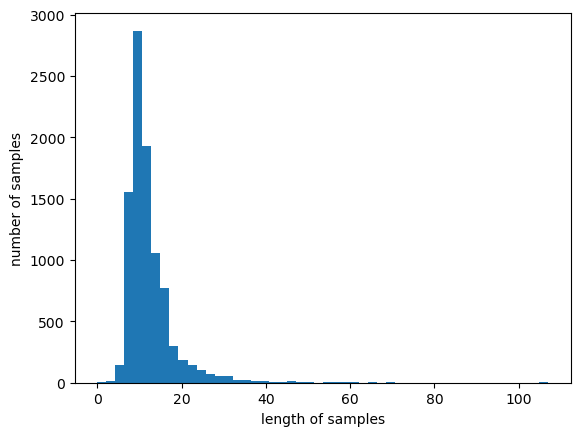

In [73]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [74]:
def below_threshold_len(max_len, nested_list):
    count = 0
    for sentence in nested_list:
        if(len(sentence) <= max_len):
            count = count + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [75]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 98.30345710627401


In [76]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [86]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=100, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/100
117/118 [============================>.] - ETA: 0s - loss: 0.2294 - acc: 0.9339
Epoch 1: val_acc improved from -inf to 0.94560, saving model to best_model.h5
118/118 [==============================] - 4s 25ms/step - loss: 0.2294 - acc: 0.9338 - val_loss: 0.1684 - val_acc: 0.9456
Epoch 2/100
116/118 [============================>.] - ETA: 0s - loss: 0.1551 - acc: 0.9460
Epoch 2: val_acc did not improve from 0.94560
118/118 [==============================] - 3s 25ms/step - loss: 0.1551 - acc: 0.9461 - val_loss: 0.1943 - val_acc: 0.9424
Epoch 3/100
117/118 [============================>.] - ETA: 0s - loss: 0.1301 - acc: 0.9562
Epoch 3: val_acc improved from 0.94560 to 0.94613, saving model to best_model.h5
118/118 [==============================] - 3s 27ms/step - loss: 0.1300 - acc: 0.9562 - val_loss: 0.1669 - val_acc: 0.9461
Epoch 4/100
116/118 [============================>.] - ETA: 0s - loss: 0.1137 - acc: 0.9617
Epoch 4: val_acc did not improve from 0.94613
118/118 [======

In [87]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

98/98 [==============================] - 1s 4ms/step - loss: 0.2215 - acc: 0.9437

 테스트 정확도: 0.9437


In [88]:
def sentiment_predict(new_sentence):
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
    new_sentence = okt.morphs(new_sentence)
    new_sentence = [word for word in new_sentence if not word in stopwords]
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen = max_len)
    score = float(loaded_model.predict(pad_new))
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [89]:
sentiment_predict('이 상품 진짜 좋아요... 저는 강추합니다. 대박')

1/1 [==============================] - 0s 122ms/step
99.62% 확률로 긍정 리뷰입니다.


In [90]:
sentiment_predict('비싼거 같아요 보세랑 다를게 없네요 흑')

1/1 [==============================] - 0s 8ms/step
84.39% 확률로 긍정 리뷰입니다.


In [91]:
sentiment_predict('색감도 괜찮은 것 같습니다. 잘 입을 것 같네요.')

1/1 [==============================] - 0s 8ms/step
99.25% 확률로 긍정 리뷰입니다.


In [92]:
sentiment_predict('색깔이 너무 잘 나온 것 같아요. 다른 색상도 구매할 예정입니다')

1/1 [==============================] - 0s 7ms/step
99.81% 확률로 긍정 리뷰입니다.


In [93]:
sentiment_predict('깔끔한 포장 감사합니다 잘받았습니다 착용 후기 남길게요')

1/1 [==============================] - 0s 8ms/step
99.84% 확률로 긍정 리뷰입니다.
